# **AT1 - AUSTRALIAN SKILLS CLASSIFICATION ANALYSIS**

--------------------------------------------------------------------------------



## **36118 APPLIED NATURAL LANGUAGE PROCESSING - AUTUMN 2025**

## **Shashikanth Senthil Kumar**

## **25218722**

# **Table of Contents**


1.   Project Overview
2.   Data Understanding

    2.1. Install and Import Packages

    2.2. Data Loading

    2.3. General EDA

3.   Selected Datasets
4.   Preprocessing Steps
5.   Word Frequency Analysis
6.   TF-IDF Analysis
7.   N-gram Analysis
8.   Topic Modeling
9.   Clustering Analysis
10.  Similarity Analysis

    10.1. ESCO Dataset

    10.2. Cosine Similarity using TF-IDF

    10.3. BERT Embeddings

11.  Key Findings
12.  Future Skills for Data Scientists
13.  Conclusion and Future Works
14. References



## **1. Project Overview**  

The **Australian Skills Classification (ASC) 2024 dataset** provides a structured taxonomy of occupations and skills relevant to the Australian job market.To understand it strength and weakness this project performs a detailed **text analysis** with various **Natural Language Processing (NLP) techniques**, including **word frequency analysis, n-gram analysis, topic modeling, clustering, and similarity analysis**.


After analyzing the ASC dataset, this project also **compares it with the European Skills Competences, Qualifications, and Occupations (ESCO) taxonomy** to find similarities and differences in skill representation between the two classification systems. By leveraging **text similarity techniques** such as TF-IDF and **embedding-based models** (e.g., BERT), we identify gaps and overlaps between Australian and European occupational taxonomies.  

The insights from this study will help in understanding:
- The **strengths and limitations** of the ASC taxonomy.  
- Key **trends in job descriptions** and skill distributions.  
- How **occupational classifications** differ across regions.  
- The **impact of AI and automation** on future skill requirements.  

This analysis provides valuable findings for **Students, educators, and workforce planners** to find the developing skills and demands, which will help them to improve their chances of securing a job in this evolving job market.

# **2. Data Understanding**

To perform the analysis, we first **installed and imported all necessary libraries** required for text processing and visualization, including **NLTK, Gensim, pyLDAvis, and umap**. And then, we downloaded **Punk_tab, Stopwords, and WordNet** from the **NLTK library** to assist in tokenization, stopword removal, and lemmatization.  

Next, we loaded the given **Excel file** (Australian Skills Classification dataset) and automated the process of **assigning each sheet as a separate DataFrame** (df1, df2, df3, ...). This revealed that the dataset consists of **11 different sheets**, each containing different aspects of skill classification.  

To gain an initial understanding of the dataset, we performed **general Exploratory Data Analysis (EDA)** on each sheet, including:  
- Displaying the **first few rows** using `head()`.   
- Generating **statistical summaries** for both numerical (`describe()`) and categorical (`describe(include='object')`) columns.  
- Checking **data types** using `info()`.
- Checking **null values** using `isna()`.
- Identifying **duplicate records** and assessing **data quality**.

## 2.1. Install and Import Packages

In [189]:
# When you run for the first time make sure to remove the Quotes and run the below code to install the required packages to run this project
"""
!pip install pyLDAvis
!pip install umap-learn
!pip install sentence-transformers
!pip install gensim
!pip install spacy
!pip install wordcloud
!pip install nltk
"""

'\n!pip install pyLDAvis\n!pip install umap-learn\n!pip install sentence-transformers\n!pip install gensim\n!pip install spacy\n!pip install wordcloud\n!pip install nltk\n'

In [190]:
# Import all the required packages
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import torch
import gensim
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pyLDAvis # Module for interactive topic model visualization
from pyLDAvis.gensim import prepare # Function to prepare LDA model for visualiztion
from collections import Counter
from nltk import bigrams
import networkx as nx
from nltk.util import ngrams
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from wordcloud import WordCloud
from gensim import corpora, models
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from umap import UMAP
from sklearn.metrics.pairwise import cosine_similarity

In [191]:
# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [192]:
import warnings
warnings.filterwarnings('ignore')

In [193]:
# Initialize lemmatizer and Stop words
lemmatizer = WordNetLemmatizer()
stop_words =stopwords.words('english')

In [194]:
# This code is to display the entire output of the code
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", None)  # Adjust width to fit the screen
pd.set_option("display.max_colwidth", None)  # Show full column contents


## 2.2 Data Loading

In [195]:
# Load all sheets into a dictionary
file_path = "Australian Skills Classification - December 2023.xlsx"
dfs = pd.read_excel(file_path, sheet_name=None)  # Load all sheets


Assign each sheets in the file as seperate datasets to explore each

In [196]:
# Dynamically assign each sheet to df1, df2, df3, ...
for i, (sheet_name, df) in enumerate(dfs.items(), start=1):
    globals()[f"df{i}"] = df  # Creates df1, df2, df3, ...
print(i) # To find how many sheets we have in the given excel file


11


## 2.3 General EDA

Dataset 1

In [197]:
df1.head()

Unnamed: 0  \
0                                       Australian Skills Classification    
1  Version 3.0 - current at December 2023 - updated data may be available   
2                                                                   Index   
3                                                                Glossary   
4                                                 Occupation descriptions   

                                                                                                                                                                                                                                                  Unnamed: 1  
0                                                                                                                                                                                                                                                        NaN  
1                                                                                                                                                                                                                                                        NaN  
2                                                                                                                                                                                                                                                        NaN  
3                                                                                                                                                                                                             Explanation of key terms used in this dataset.  
4  ANZSCO Occupation codes and descriptions.\nSub-profile codes refer to whether an occupation is a specialisation of an occupation, or is an occupation in a not elsewhere classified (nec) category. Further information can be found in the Glossary tab.

In [198]:
df1.describe()

Unnamed: 0                                      Unnamed: 1
count                                  30                                              10
unique                                 30                                              10
top     Australian Skills Classification   Explanation of key terms used in this dataset.
freq                                    1                                               1

In [199]:
df1.describe(include='object')

Unnamed: 0                                      Unnamed: 1
count                                  30                                              10
unique                                 30                                              10
top     Australian Skills Classification   Explanation of key terms used in this dataset.
freq                                    1                                               1

In [200]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30 non-null     object
 1   Unnamed: 1  10 non-null     object
dtypes: object(2)
memory usage: 772.0+ bytes


In [201]:
df1.duplicated().sum()

9

In [202]:
df1.isna().sum()

Unnamed: 0    10
Unnamed: 1    30
dtype: int64

INSIGHTS:

* This dataset seems like it only contains the Table of the web page,which is not useful for text analysis. So most likely we will skip this dataset.


Dataset 2

In [203]:
df2.head()

Glossary of key terms  \
0                            ANZSCO   
1  Australian Skills Classification   
2                  Cluster families   
3           Common technology tools   
4                   Core competency   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Unnamed: 1  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Australian and New Zealand Standard Classification of Occupations (ANZSCO) produced by the Australian Bureau of Statistics. All Australian Skills Classification profiles are based on an ANZSCO Occupation and ANZSCO code.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              The Australian Skills Classification (the Classification) sets out the key core competencies, specialist tasks and technology tools required for occupations in Australia. The Classification offers a common language of skills, enabling stakeholders to identify and articulate skills using a comprehensive and universal taxonomy.  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Groupings of similar Specialist Clusters  
3  Several technology tools are so universal today that they are likely to be used by most or all occupations, and these are listed here. These tools are: Office suite software (email and calendar software, word processing software, spreadsheet software, presentation software, desktop publishing software), search engine software, information retriev

In [204]:
df2.describe()

Glossary of key terms  \
count                     15   
unique                    15   
top                   ANZSCO   
freq                       1   

                                                                                                                                                                                                                          Unnamed: 1  
count                                                                                                                                                                                                                             15  
unique                                                                                                                                                                                                                            15  
top     Australian and New Zealand Standard Classification of Occupations (ANZSCO) produced by the Australian Bureau of Statistics. All Australian Skills Classification profiles are based on an ANZSCO Occupation and ANZSCO code.  
freq                                                                                                                                                                                                                               1

In [205]:
df2.describe(include='object')

Glossary of key terms  \
count                     15   
unique                    15   
top                   ANZSCO   
freq                       1   

                                                                                                                                                                                                                          Unnamed: 1  
count                                                                                                                                                                                                                             15  
unique                                                                                                                                                                                                                            15  
top     Australian and New Zealand Standard Classification of Occupations (ANZSCO) produced by the Australian Bureau of Statistics. All Australian Skills Classification profiles are based on an ANZSCO Occupation and ANZSCO code.  
freq                                                                                                                                                                                                                               1

In [206]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Glossary of key terms  15 non-null     object
 1   Unnamed: 1             15 non-null     object
dtypes: object(2)
memory usage: 372.0+ bytes


In [207]:
df2.duplicated().sum()

0

In [208]:
df2.isna().sum()

Glossary of key terms    0
Unnamed: 1               0
dtype: int64

In [209]:
gloss_df = df2.copy()

INSIGHTS:

*  This dataset contains definitions and explanations of terms,which can be useful for text processing. So we will retain this dataset and save it as glossary_df.



Dataset 3

In [210]:
df3.head()

Occupation Type  ANZSCO Code Sub-Profile Code                             ANZSCO Title  \
0        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
1        ANZSCO 4         1112              NaN                         General Managers   
2        ANZSCO 4         1211              NaN                      Aquaculture Farmers   
3        ANZSCO 4         1213              NaN                        Livestock Farmers   
4        ANZSCO 4         1215              NaN                   Broadacre Crop Growers   

                                                                                                                                                                                                                     ANZSCO Description  
0  Chief Executives and Managing Directors determine, formulate and review the general policy programs and the overall direction of organisations within the framework established by boards of directors and similar governing bodies.  
1   General Managers plan, organise, direct, control and review the day-to-day operations and major functions of commercial, industrial, government and defence organisations through departmental managers and subordinate executives.  
2                                                                                               Aquaculture Farmers plan, organise, control, coordinate and perform farming operations to breed and raise fish and other aquatic stock.  
3                                       Livestock Farmers plan, organise, control, coordinate and perform farming operations to breed and raise livestock for the production of breeding stock, milk, eggs, meat, honey, wool and hair.  
4                                      Broadacre Crop Growers plan, organise, control, coordinate and perform farming operations to grow broadacre crops such as cereals, oilseeds, pulses, sugar cane, rice, cotton and pasture crops.

In [211]:
df3.describe()

ANZSCO Code
count    1650.000000
mean   334783.431515
std    259542.483176
min      1111.000000
25%    149236.750000
50%    254419.500000
75%    452186.000000
max    899999.000000

In [212]:
df3.describe(include='object')

Occupation Type Sub-Profile Code                             ANZSCO Title  \
count             1650              472                                     1650   
unique               5               23                                     1650   
top           ANZSCO 6              S01  Chief Executives and Managing Directors   
freq               806               82                                        1   

                                                                                                                                                                                                                          ANZSCO Description  
count                                                                                                                                                                                                                                   1650  
unique                                                                                                                                                                                                                                  1650  
top     Chief Executives and Managing Directors determine, formulate and review the general policy programs and the overall direction of organisations within the framework established by boards of directors and similar governing bodies.  
freq                                                                                                                                                                                                                                       1

In [213]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB


In [214]:
df3.duplicated().sum()

0

In [215]:
df3.isna().sum()

Occupation Type          0
ANZSCO Code              0
Sub-Profile Code      1178
ANZSCO Title             0
ANZSCO Description       0
dtype: int64

In [216]:
occ_df = df3.copy()

INSIGHTS:

* This dataset contains job-related text that can be analyzed for trends and insights. So we will retain this dataset and save it as occ_df.

Dataset 4

In [217]:
df4.head()

Core Competency  \
0  Digital engagement   
1  Digital engagement   
2  Digital engagement   
3  Digital engagement   
4  Digital engagement   

                                                                                  Core Competency Description  \
0  Identifying and using technology (including hardware and software) confidently, creatively and critically.   
1  Identifying and using technology (including hardware and software) confidently, creatively and critically.   
2  Identifying and using technology (including hardware and software) confidently, creatively and critically.   
3  Identifying and using technology (including hardware and software) confidently, creatively and critically.   
4  Identifying and using technology (including hardware and software) confidently, creatively and critically.   

   Score Proficiency Level  \
0      1             Basic   
1      2             Basic   
2      3             Basic   
3      4      Intermediate   
4      5      Intermediate   

                                                                                      Anchor Value  
0  Name and identify the purpose of familiar digital devices (e.g. mobile phone, computer, tablet)  
1                   Send a short and simple reply to an email communication using a digital device  
2                                                                Enter information into a database  
3             Recognise different ways to connect to the internet (e.g. Bluetooth, Wi-Fi, hotspot)  
4                             Build and maintain an effective online profile for career management

In [218]:
df4.describe()

Score
count  100.000000
mean     5.500000
std      2.886751
min      1.000000
25%      3.000000
50%      5.500000
75%      8.000000
max     10.000000

In [219]:
df4.describe(include='object')

Core Competency  \
count                  100   
unique                  10   
top     Digital engagement   
freq                    10   

                                                                                       Core Competency Description  \
count                                                                                                          100   
unique                                                                                                          10   
top     Identifying and using technology (including hardware and software) confidently, creatively and critically.   
freq                                                                                                            10   

       Proficiency Level  \
count                100   
unique                 3   
top         Intermediate   
freq                  40   

                                                                                           Anchor Value  
count                                                                                               100  
unique                                                                                              100  
top     Name and identify the purpose of familiar digital devices (e.g. mobile phone, computer, tablet)  
freq                                                                                                  1

In [220]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value                 100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [221]:
df4.duplicated().sum()

0

In [222]:
df4.isna().sum()

Core Competency                0
Core Competency Description    0
Score                          0
Proficiency Level              0
Anchor Value                   0
dtype: int64

INSIGHTS:

* This dataset doesnot have any information about the job roles so we will skip this dataset.

Dataset 5

In [223]:
df5.head()

Specialist Task  \
0                  Advise others on farming or forestry operations, regulations or equipment   
1  Estimate labour or resource requirements for forestry, fishing or agricultural operations   
2                                                 Promote agricultural or hunting activities   
3                                                               Develop agricultural methods   
4                                           Evaluate quality or condition of plants or crops   

                         Specialist Cluster           Cluster Family  \
0  Direct or advise on agricultural matters  Agriculture and animals   
1  Direct or advise on agricultural matters  Agriculture and animals   
2  Direct or advise on agricultural matters  Agriculture and animals   
3    Manage agricultural processes or tasks  Agriculture and animals   
4    Manage agricultural processes or tasks  Agriculture and animals   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Skill Statement  
0                                                                                                                                                                                          Provide advice about managing farms and forests, such as compliance with government regulations and guidelines or industry standards; planting, harvesting, or managing healthy crops; maintaining healthy livestock; selecting and evaluating equipment; and ensuring safe operations.  
1  Calculate or estimate labour, equipment, and resource needs for forestry, fishing, or agricultural operations using available data. Estimate personnel requirements, equipment usage, material quantities, and associated costs to ensure efficient and effective resource allocation based on factors such as market conditions, seasonal conditions, and scope of operations. Consider factors such as resource availability and staff qualifications or technical expertise.  
2                                                                                                                                                                                         Raise awareness of agricultural practices and activities or safe and ethical hunting and trapping by providing information about activities, sustainable practices, or advocating for agriculture or hunting and trapping practices in contexts such as community or educational events.  
3                                        Develop or design new or improved agricultural methods that ensure or improve factors such as sustainability, quality, productivity, or resource efficiency in an agricultural or land management context. This may include developing or modifying techniques or incorporating methods or insights from other fields of study. Ensure that methods are robust, adaptable, and aligned with analytical goals and industry best practices.  
4                                                              Judge the physical quality, health and condition of plants or crops through inspections and tests of the plants, crops, and growing environment. Utilise technical knowledge, and appropriate techniques or tools to determine the presence of disease, stress, growth issues, damage or undesirable traits, and the underlying cause such as pest infestations, nutrient deficiencies, or environmental stressors.

In [224]:
df5.describe()

Specialist Task  \
count                                                                        1686   
unique                                                                       1686   
top     Advise others on farming or forestry operations, regulations or equipment   
freq                                                                            1   

                                    Specialist Cluster   Cluster Family  \
count                                             1686             1686   
unique                                             272               31   
top     Inspect, test or maintain equipment or systems  Health and care   
freq                                                25              150   

                                                                                                                                                                                                                                                                                Skill Statement  
count                                                                                                                                                                                                                                                                                      1686  
unique                                                                                                                                                                                                                                                                                     1686  
top     Provide advice about managing farms and forests, such as compliance with government regulations and guidelines or industry standards; planting, harvesting, or managing healthy crops; maintaining healthy livestock; selecting and evaluating equipment; and ensuring safe operations.  
freq                                                                                                                                                                                                                                                                                          1

In [225]:
df5.describe(include='object')

Specialist Task  \
count                                                                        1686   
unique                                                                       1686   
top     Advise others on farming or forestry operations, regulations or equipment   
freq                                                                            1   

                                    Specialist Cluster   Cluster Family  \
count                                             1686             1686   
unique                                             272               31   
top     Inspect, test or maintain equipment or systems  Health and care   
freq                                                25              150   

                                                                                                                                                                                                                                                                                Skill Statement  
count                                                                                                                                                                                                                                                                                      1686  
unique                                                                                                                                                                                                                                                                                     1686  
top     Provide advice about managing farms and forests, such as compliance with government regulations and guidelines or industry standards; planting, harvesting, or managing healthy crops; maintaining healthy livestock; selecting and evaluating equipment; and ensuring safe operations.  
freq                                                                                                                                                                                                                                                                                          1

In [226]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Specialist Task     1686 non-null   object
 1   Specialist Cluster  1686 non-null   object
 2   Cluster Family      1686 non-null   object
 3   Skill Statement     1686 non-null   object
dtypes: object(4)
memory usage: 52.8+ KB


In [227]:
df5.duplicated().sum()

0

In [228]:
df5.isna().sum()

Specialist Task       0
Specialist Cluster    0
Cluster Family        0
Skill Statement       0
dtype: int64

INSIGHTS:

* This dataset doesnot have any information on the job roles so we will skip this dataset.

Dataset 6

In [229]:
df6.head()

Technology Tool Category  \
0  Broadcasting and audio-visual production technologies   
1  Broadcasting and audio-visual production technologies   
2  Broadcasting and audio-visual production technologies   
3  Broadcasting and audio-visual production technologies   
4                             Communication technologies   

                               Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news content production   
1  Systems for audio, video, multimedia and news content production   
2  Systems for audio, video, multimedia and news content production   
3  Systems for audio, video, multimedia and news content production   
4                  Data, voice and/or video communication platforms   

                           Technology Tool  \
0  Collaborative news production platforms   
1          Music or sound editing software   
2                 Sound and audio hardware   
3      Video creation and editing software   
4        Audio/video conferencing software   

                                                                                                            Technology Tool Description  \
0                                                      Software used to create and manage news content by media outlets and journalists   
1                                                                    Software used to create, manipulate, and edit digital audio files.   
2                                                                  Apparatus used to create, manipulate, mix and/or record audio/sound.   
3                                                                                 Software used to create and edit digital video files.   
4  Software for collaboration using video or audio conferencing, text-based messaging and screen or other visual sharing or presenting.   

                                                                                                                                                                                                                                                                                                                                             Technology Tool Extended Description  
0                                                                                             Collaborative news production platforms encompasses software and systems used by journalists and newsrooms to track the creation of new stories and produce news bulletins. This technology tool is used by newspapers, radio stations, and TV stations, and online news platforms.  
1                                                                          Music and sound editing software incorporates the suite of software tools and programs used to create and edit digital audio files. Software used under this technology tool provides the functionality to compose and notate music, record and edit soundtracks, and master digital audio recordings.  
2                                                                                                                                                                                                                                   Hardware and equipment used to generate electronic sounds and audio. Equipment can be used to create, amplify, mix, record, and master audio.  
3                                                                                                                                                                                                     Video creation and editing software enables the creation and editing of digital video files. This technology tool may be interlinked with Music or sound editing software.   
4  Audio/video conferencing software enables people to people to hold online meetings and present visual information using visual or screen sharing functionalities. As audio/video conferencing software works over a network connection. Users of audio/video conferencing sof

In [230]:
df6.describe()

Technology Tool Category  \
count                                              94   
unique                                             27   
top     IT Infrastructure and management technologies   
freq                                               11   

                                                                                Technology Tool Category Description  \
count                                                                                                             94   
unique                                                                                                            26   
top     Software, hardware, and other tools for the development and maintenance of complex backend IT infrastructure   
freq                                                                                                              11   

                                Technology Tool  \
count                                        94   
unique                                       94   
top     Collaborative news production platforms   
freq                                          1   

                                                             Technology Tool Description  \
count                                                                                 94   
unique                                                                                94   
top     Software used to create and manage news content by media outlets and journalists   
freq                                                                                   1   

                                                                                                                                                                                                                                                       Technology Tool Extended Description  
count                                                                                                                                                                                                                                                                                    94  
unique                                                                                                                                                                                                                                                                                   94  
top     Collaborative news production platforms encompasses software and systems used by journalists and newsrooms to track the creation of new stories and produce news bulletins. This technology tool is used by newspapers, radio stations, and TV stations, and online news platforms.  
freq                                                                                                                                                                                                                                                                                      1

In [231]:
df6.describe(include='object')

Technology Tool Category  \
count                                              94   
unique                                             27   
top     IT Infrastructure and management technologies   
freq                                               11   

                                                                                Technology Tool Category Description  \
count                                                                                                             94   
unique                                                                                                            26   
top     Software, hardware, and other tools for the development and maintenance of complex backend IT infrastructure   
freq                                                                                                              11   

                                Technology Tool  \
count                                        94   
unique                                       94   
top     Collaborative news production platforms   
freq                                          1   

                                                             Technology Tool Description  \
count                                                                                 94   
unique                                                                                94   
top     Software used to create and manage news content by media outlets and journalists   
freq                                                                                   1   

                                                                                                                                                                                                                                                       Technology Tool Extended Description  
count                                                                                                                                                                                                                                                                                    94  
unique                                                                                                                                                                                                                                                                                   94  
top     Collaborative news production platforms encompasses software and systems used by journalists and newsrooms to track the creation of new stories and produce news bulletins. This technology tool is used by newspapers, radio stations, and TV stations, and online news platforms.  
freq                                                                                                                                                                                                                                                                                      1

In [232]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              94 non-null     object
 1   Technology Tool Category Description  94 non-null     object
 2   Technology Tool                       94 non-null     object
 3   Technology Tool Description           94 non-null     object
 4   Technology Tool Extended Description  94 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [233]:
df6.duplicated().sum()

0

In [234]:
df6.isna().sum()

Technology Tool Category                0
Technology Tool Category Description    0
Technology Tool                         0
Technology Tool Description             0
Technology Tool Extended Description    0
dtype: int64

INSIGHTS:

* This dataset has only the description of the tools and didn't show which tool is used ib which job. So, we will skip this dataset.

Dataset 7

In [235]:
df7.head()

Occupation Type  ANZSCO Code  Sub-Profile Code  \
0        ANZSCO 6       422111               NaN   
1        ANZSCO 6       422111               NaN   
2        ANZSCO 6       422111               NaN   
3        ANZSCO 6       422111               NaN   
4        ANZSCO 6       422111               NaN   

                                             ANZSCO Title            Core Competency  Score  \
0  Aboriginal and Torres Strait Islander Education Worker         Digital engagement      5   
1  Aboriginal and Torres Strait Islander Education Worker  Initiative and innovation      8   
2  Aboriginal and Torres Strait Islander Education Worker                   Learning      5   
3  Aboriginal and Torres Strait Islander Education Worker                   Numeracy      4   
4  Aboriginal and Torres Strait Islander Education Worker         Oral communication      7   

  Proficiency Level  \
0      Intermediate   
1              High   
2      Intermediate   
3      Intermediate   
4      Intermediate   

                                                                                         Anchor Value  
0                                Build and maintain an effective online profile for career management  
1                               Negotiate a price and sales terms then prepare a contract for a house  
2  Learn a new filing system that groups documents by type, security classification, subject and date  
3                                      Use a blood pressure machine and accurately record the results  
4                               Participate in a work meeting and ask appropriate follow up questions

In [236]:
df7.describe()

ANZSCO Code  Sub-Profile Code         Score
count   11030.000000               0.0  11030.000000
mean   302636.942883               NaN      5.930644
std    266621.743882               NaN      1.479878
min      1111.000000               NaN      1.000000
25%      8399.000000               NaN      5.000000
50%    252711.000000               NaN      6.000000
75%    423411.000000               NaN      7.000000
max    899923.000000               NaN     10.000000

In [237]:
df7.describe(include='object')

Occupation Type ANZSCO Title     Core Competency Proficiency Level  \
count            11030        11030               11030             11030   
unique               2         1101                  10                 3   
top           ANZSCO 6    Zoologist  Digital engagement      Intermediate   
freq              8070           20                1103              9035   

                                                                 Anchor Value  
count                                                                   11030  
unique                                                                     78  
top     Negotiate a price and sales terms then prepare a contract for a house  
freq                                                                      402

In [238]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Occupation Type    11030 non-null  object 
 1   ANZSCO Code        11030 non-null  int64  
 2   Sub-Profile Code   0 non-null      float64
 3   ANZSCO Title       11030 non-null  object 
 4   Core Competency    11030 non-null  object 
 5   Score              11030 non-null  int64  
 6   Proficiency Level  11030 non-null  object 
 7   Anchor Value       11030 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 689.5+ KB


In [239]:
df7.duplicated().sum()

20

In [240]:
df7.isna().sum()

Occupation Type          0
ANZSCO Code              0
Sub-Profile Code     11030
ANZSCO Title             0
Core Competency          0
Score                    0
Proficiency Level        0
Anchor Value             0
dtype: int64

In [241]:
comp_df = df7.copy()

INSIGHTS:

* This dataset lists of competencies and proficiency levels, crucial for skills classification analysis. So we will retain this dataset and save it as comp_df.

Dataset 8

In [242]:
df8.head()

Occupation Type  ANZSCO Code Sub-Profile Code                             ANZSCO Title  \
0        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
1        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
2        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
3        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
4        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   

                                                         Specialist Task  % of time spent on task  \
0                    Direct or manage financial activities or operations                   0.1302   
1                         Direct department or organisational activities                   0.1117   
2                 Direct sales, marketing or customer service activities                   0.0808   
3  Communicate with others to arrange, coordinate, or conduct activities                   0.0665   
4            Analyse data to assess operational or project effectiveness                   0.0651   

  Emerging/\nTrending Flag                                  Specialist Cluster  \
0                      NaN  Manage, monitor and undertake financial activities   
1                 Trending                Manage services, staff or activities   
2                      NaN                Manage services, staff or activities   
3                      NaN              Communicate or collaborate with others   
4                      NaN            Use data to inform operational decisions   

    % of time spent on cluster                                Cluster Family  \
0                       0.1644  Business operations and financial activities   
1                       0.2128  Business operations and financial activities   
2                       0.2128  Business operations and financial activities   
3                       0.0750               Communication and collaboration   
4                       0.1009                Data, analytics, and databases   

   % of time spent on family  \
0                     0.5322   
1                     0.5322   
2                     0.5322   
3                     0.0890   
4                     0.1370   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Skills Statement  
0                                                                                                                                                                 Direct and oversee the financial operations of a business, organisation, operation, or project, such as budgeting, accounting, financial reporting, and risk management. This may include providing specialist or technical knowledge and guidance or undertaking general project management tasks to ensure service goals, timelines and budgets are met - such as managing staff and resource allocation; providing supervision, guidance and direction; and ensuring legislative or regulatory requirements are adhered to.  
1                                                                                                                                                                                                                                                                 Direct and oversee the activities of a work unit, department, or or

In [243]:
df8.describe()

ANZSCO Code  % of time spent on task   % of time spent on cluster  \
count   30450.000000             23934.000000                 23934.000000   
mean   312357.360690                 0.046078                     0.097595   
std    252658.422368                 0.038938                     0.102286   
min      1111.000000                 0.000107                     0.000107   
25%    134214.000000                 0.022096                     0.031000   
50%    253399.000000                 0.036996                     0.060118   
75%    422115.000000                 0.058932                     0.125439   
max    899999.000000                 0.775100                     0.934207   

       % of time spent on family  
count               23934.000000  
mean                    0.285302  
std                     0.262636  
min                     0.000400  
25%                     0.069700  
50%                     0.179000  
75%                     0.456939  
max                     1.000000

In [244]:
df8.describe(include='object')

Occupation Type Sub-Profile Code           ANZSCO Title  \
count            30450             6516                  30450   
unique               4               23                   1575   
top           ANZSCO 6              N01  Systems Administrator   
freq             17934             1263                     45   

                                                                                                                Specialist Task  \
count                                                                                                                     30450   
unique                                                                                                                     1686   
top     Review designs, blueprints, specifications, diagrams, work orders or other documentation to determine work requirements   
freq                                                                                                                        226   

       Emerging/\nTrending Flag                                    Specialist Cluster  \
count                      1402                                                 30450   
unique                        2                                                   272   
top                    Trending  Provide customer service and communicate information   
freq                       1086                                                   597   

         Cluster Family  \
count             30450   
unique               31   
top     Health and care   
freq               3365   

                                                                                                                                                                                                                                                                                                                                                                                    Skills Statement  
count                                                                                                                                                                                                                                                                                                                                                                                          30450  
unique                                                                                                                                                                                                                                                                                                                                                                                          1687  
top     Read, interpret, and understand work documentation such as reports, designs, blueprints, specifications, work orders, technical information, or other instructions to determine work requirements. These may include the required materials, resources, equipment, tools, machinery, timeframes, dependencies, procedures, processes, sequences, or methods to deliver the required outcome.  
freq                                                                                                                                                                                                                                                                                                                                                                                             226

In [245]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type              30450 non-null  object 
 1   ANZSCO Code                  30450 non-null  int64  
 2   Sub-Profile Code             6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster           30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family               30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.8+ MB


In [246]:
df8.duplicated().sum()

0

In [247]:
df8.isna().sum()

Occupation Type                    0
ANZSCO Code                        0
Sub-Profile Code               23934
ANZSCO Title                       0
Specialist Task                    0
% of time spent on task         6516
Emerging/\nTrending Flag       29048
Specialist Cluster                 0
 % of time spent on cluster     6516
Cluster Family                     0
% of time spent on family       6516
Skills Statement                   0
dtype: int64

In [248]:
skill_df= df8.copy()

INSIGHTS:

* This Dataset provides structured tasks, which can be useful for skill grouping.So we retain this dataset and save it as skill_df.

Dataset 9

In [249]:
df9.head()

Occupation Type  ANZSCO Code Sub-Profile Code                             ANZSCO Title  \
0        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
1        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
2        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
3        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
4        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   

                                       Technology Tool Emerging/Trending Flag  
0          Accounting and financial management systems                    NaN  
1                    Audio/video conferencing software                    NaN  
2  Business intelligence and decision support software                    NaN  
3                      Flow chart and diagram software                    NaN  
4                             Human resources software                    NaN

In [250]:
df9.describe()

ANZSCO Code
count    5761.000000
mean   246205.815657
std    196733.021233
min      1111.000000
25%    133211.000000
50%    233999.000000
75%    311212.000000
max    899999.000000

In [251]:
df9.describe(include='object')

Occupation Type Sub-Profile Code            ANZSCO Title              Technology Tool  \
count             5761             1300                    5761                         5761   
unique               4               20                    1317                           95   
top           ANZSCO 6              N01  Database Administrator  Project management software   
freq              3275              254                      25                          443   

       Emerging/Trending Flag  
count                     441  
unique                      2  
top                  Trending  
freq                      304

In [252]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Occupation Type         5761 non-null   object
 1   ANZSCO Code             5761 non-null   int64 
 2   Sub-Profile Code        1300 non-null   object
 3   ANZSCO Title            5761 non-null   object
 4   Technology Tool         5761 non-null   object
 5   Emerging/Trending Flag  441 non-null    object
dtypes: int64(1), object(5)
memory usage: 270.2+ KB


In [253]:
df9.duplicated().sum()

4

In [254]:
df9.isna().sum()

Occupation Type              0
ANZSCO Code                  0
Sub-Profile Code          4461
ANZSCO Title                 0
Technology Tool              0
Emerging/Trending Flag    5320
dtype: int64

In [255]:
tools_df=df9.copy()

INSIGHTS:

* This dataset contains the lists of relevant tools and technologies, which can be useful for AI skill analysis. so we retain this dataset and save it as tools_df.

Dataset 10

In [256]:
df10.head()

Technology Tool                           Technology Tool Example
0  Collaborative news production platforms  The Associated Press ENPS News Production System
1  Collaborative news production platforms                                     NewsBoss MoJo
2  Collaborative news production platforms                                       Myriad News
3  Collaborative news production platforms                                           Octopus
4  Collaborative news production platforms                                        Open Media

In [257]:
df10.describe()

Technology Tool Technology Tool Example
count                                712                     712
unique                                94                     693
top     Science and engineering software                  Hadoop
freq                                 157                       3

In [258]:
df10.describe(include='object')

Technology Tool Technology Tool Example
count                                712                     712
unique                                94                     693
top     Science and engineering software                  Hadoop
freq                                 157                       3

In [259]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Technology Tool          712 non-null    object
 1   Technology Tool Example  712 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [260]:
df10.duplicated().sum()

1

In [261]:
df10.isna().sum()

Technology Tool            0
Technology Tool Example    0
dtype: int64

INSIGHTS:

* This Dataset consists only a list of examples, so this is not a core analysis material.

Dataset 11

In [262]:
df11.head()

Common Technology Tools
0         Spreadsheet software
1     Word processing software
2        Presentation software
3  Email and calendar software
4  Other Office suite software

In [263]:
df11.describe()

Common Technology Tools
count                       13
unique                      13
top       Spreadsheet software
freq                         1

In [264]:
df11.describe(include='object')

Common Technology Tools
count                       13
unique                      13
top       Spreadsheet software
freq                         1

In [265]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Common Technology Tools  13 non-null     object
dtypes: object(1)
memory usage: 236.0+ bytes


In [266]:
df11.duplicated().sum()

0

In [267]:
df11.isna().sum()

Common Technology Tools    0
dtype: int64

INSIGHTS:

* This Dataset is similar to the above dataset which doesnot provide much insight. So we will skip this dataset.

# 3. **Selected Datasets**

After completing a **general exploratory data analysis (EDA)** on the 11 sheets in the Australian Skills Classification (ASC) dataset, we identified **five key sheets** that are most relevant for text analysis:  

1. **Glossary (gloss_df)** - Contains definitions and explanations of terms, which are useful for text processing and understanding domain-specific terminology.  
2. **Occupation Details (occ_df)** - Provides job-related descriptions, allowing for analysis of trends, key skills, and competencies required for different occupations.  
3. **Core Competency Description (comp_df)** - Lists core competencies and proficiency levels, essential for analyzing skill classifications.  
4. **Specialist Task Hierarchy (skill_df)** - Details structured tasks performed within occupations, enabling better categorization and clustering of skills.  
5. **Technology Tools (tools_df)** - Provides a list of relevant tools and technologies, which is useful for understanding AI and tech-related skills.  

### **Datasets Used for Analysis**  
For this project, we selected the following two datasets for different NLP tasks:  
- **Occupation Details (occ_df)**: Used for **word frequency analysis, n-gram analysis, topic modeling, and similarity analysis** to explore trends in job descriptions and skill requirements.  
- **Specialist Task Hierarchy (skill_df)**: Used for **clustering analysis** to group skills based on their textual similarities and uncover underlying patterns.  
- **ESCO Dataset (esco_df)**: A single csv file from the ESCO Dataset named "occupations_en.csv" was used as esco_df to perform similarity analysis with occ_df to find the similar jobs in both taxonomies.

#4. **Preprocessing Steps**



To perform analysis we need to clean the dataset first for that we will define a function called occ_preprocess_text() which contains a series of preprocessing steps to clean and standardize the text data.
* **Lowercasing** - converts all the text to lowercase using text.lower() function.
* **Removing Numbers** - eliminates numeric values using regular expressions (re.sub(r'\d+', '', text)), which are irrelevantfor text based analysis.
* **Removing Punctuation** - removes special characters and punctuations using regular expressions (re.sub(r'[^\w\s]', '', text)), helps to focus only on meaningful words.
* **Tokenization** - splits the text into individual words using a NLTK library function word_tokenize().
* **Stopword Removal** - removes the most commonly used words and the words that doesn't contribute significant meaning to text (eg:'the',is','and'...).
*  **Lemmatization** - converts words to their base form using WordNetLemmatizer(), which helps to reduce the vocablary size while retaining the same meaning (eg:'running'='run').
* **Returning cleaned data** - finally the processed texts are rejoined using " ".join(tokens) and returned to do further analysis.

In [268]:
# Function for text preprocessing
def occ_preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

#5. **Word Frequency Analysis**

In this analysis, we aim to identify the most common words in occupation descriptions to understand the most in-demand skills in Australia.

**Step 1: Counting Words in Raw Descriptions**

- We first count the number of words in the description column using the word_count function.
- The word count is stored in the description_length column.
- Then, we analyze the most frequent words in the raw text (without preprocessing) to observe common patterns.

**Step 2: Preprocessing Descriptions**

- We apply the occ_preprocess_text function to clean the text by:
  - Converting to lowercase.
  - Removing numbers and punctuation.
  - Tokenizing and removing stopwords.
  - Applying lemmatization.
- The cleaned output is stored in the cleaned_description column.

**Step 3: Refining Stopwords**

- The initial word frequency analysis of cleaned_description revealed many generic job-related terms unrelated to skills.
- We created a custom stopword list and extended the stop_words set.
- The text was reprocessed using the updated stopword list.
- The final cleaned text was stored in cleaned_description_length for comparison.

**Step 4: Final Word Frequency Analysis**

- After preprocessing, we extracted the most common words from cleaned_description.
- These frequent terms provide key insights into the most in-demand skills in Australia.


## **Step 1: Counting Words in Raw Descriptions**

In [269]:
occ_df.rename(columns={'ANZSCO Description': 'description'}, inplace=True)

In [270]:
def word_count(text):
    wc = len(text.split())
    return wc

In [271]:
# create a new column consists the length of the description
occ_df['description_length'] = occ_df['description'].astype(str).apply(word_count)

In [272]:
# Combine all job descriptions
all_words = " ".join(occ_df["description"]).lower()
tokens = word_tokenize(all_words)

# Count word frequencies
word_freq = Counter(tokens)
common_words = word_freq.most_common(50)

In [273]:
for i,j in common_words:
  print(i)

and
,
.
of
the
or
to
in
'
tasks
occupation
as
a
broader
for
profile
with
is
this
be
required
registration
licensing
by
other
perform
individuals
range
may
well
such
they
all
these
order
understand
(
)
roles
some
’
s
additional
specialisation
subset
should
combined
full
undertaken
on


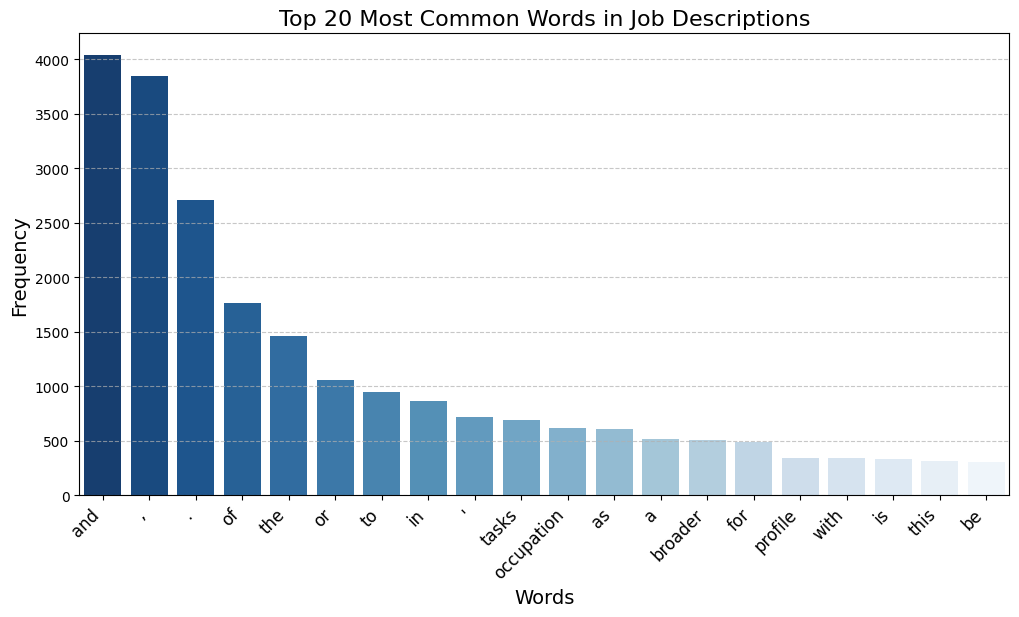

In [274]:
# Get the top 20 most common words
top_words = word_freq.most_common(20)

# Extract words and their frequencies
words, frequencies = zip(*top_words)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(frequencies), palette="Blues_r")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Words", fontsize=14)
plt.title("Top 20 Most Common Words in Job Descriptions", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)

Text(0.5, 1.0, 'Word Cloud of Job Descriptions')

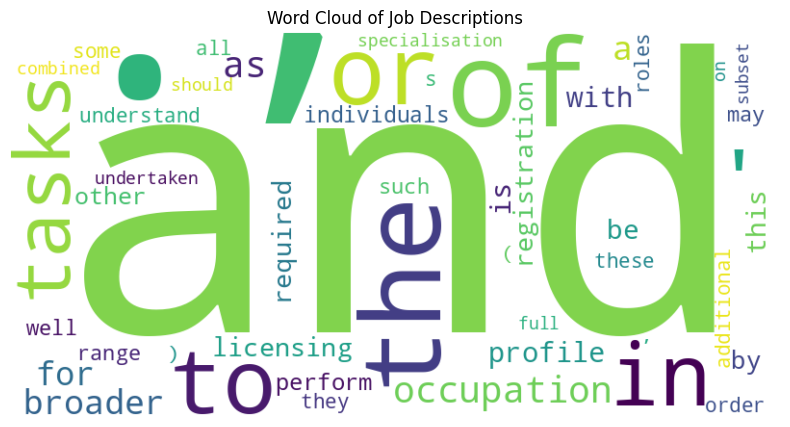

In [275]:
# Generate Word Cloud
wordcloud = WordCloud(max_words=50,width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_freq)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Job Descriptions")


## **Step 2: Preprocessing Descriptions**

In [276]:
# Apply preprocessing to job descriptions
occ_df["cleaned_description"] = occ_df["description"].astype(str).apply(occ_preprocess_text)

In [277]:
# ---- WORD FREQUENCY ANALYSIS ----
all_words = " ".join(occ_df["cleaned_description"]).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(50)  # Top 50 words

In [278]:
for i,j in common_words:
  print(i)

task
occupation
broader
profile
required
registration
licensing
plan
perform
individual
range
may
service
well
order
system
role
understand
additional
specialisation
subset
combined
full
undertaken
coordinate
care
worker
group
control
nec
health
equipment
operation
specialist
product
production
machine
data
activity
performs
assist
support
organises
design
provides
material
organisation
cover
repair
engineering


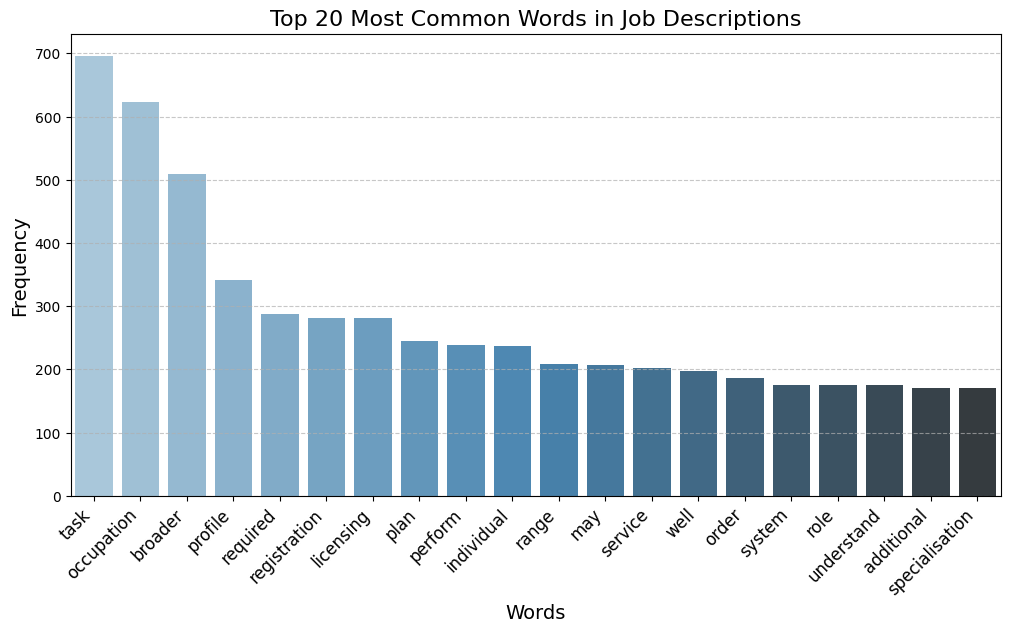

In [279]:
# Get the top 20 most common words
top_words = word_freq.most_common(20)

# Extract words and their frequencies
words, frequencies = zip(*top_words)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(frequencies), palette="Blues_d")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Words", fontsize=14)
plt.title("Top 20 Most Common Words in Job Descriptions", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)

Text(0.5, 1.0, 'Cleaned Word Cloud of Job Descriptions')

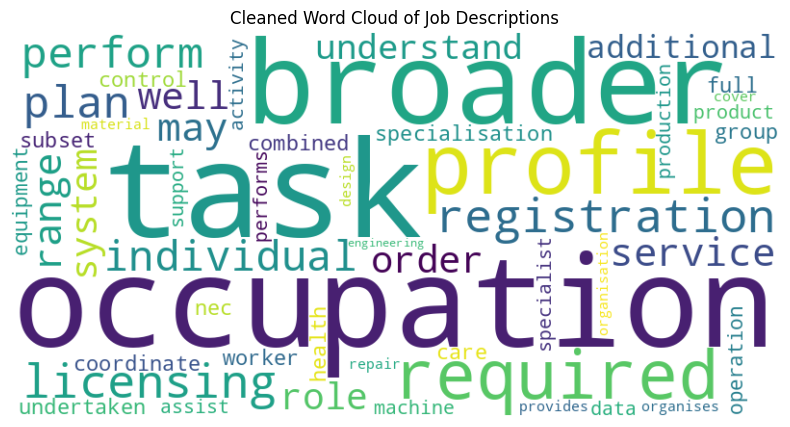

In [280]:
# Generate Word Cloud
wordcloud = WordCloud(max_words=50,width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_freq)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Cleaned Word Cloud of Job Descriptions")

## **Step 3: Refining Stopwords**

Many frequent words in job descriptions were generic, structural, or non-informative key skills. Removing them helped highlight technical and domain-specific competencies.

- Generic job terms (eg: role, task, position) lacked skill relevance.
- Structural words (eg: require, provide, ensure) described expectations, not skills.
- Industry-wide terms (eg: coordinate, organization) appeared across all fields, adding little insight.
- Common verbs (eg: plan,perform, design) described actions, not specific expertise.

In [281]:
# ---- DEFINE CUSTOM STOPWORDS ----
custom_stopwords =[
    "may", "well", "full", "additional", "understand", "order", "range",
    "occupation", "role", "worker", "group", "individual", "task", "performs", "provides", "organises",
    "broader", "profile", "required", "registration", "licensing", "subset", "combined", "undertaken",
    "plan", "perform", "coordinate", "control", "assist", "support", "design",
    "service", "system", "operation", "activity", "organisation", "cover", "data", "nec"
]

In [282]:
# Combine with NLTK stopwords
stop_words.extend(custom_stopwords)

In [283]:
#now run the preprocess again to job descriptions
occ_df["cleaned_description"] = occ_df["cleaned_description"].astype(str).apply(occ_preprocess_text)

In [284]:
# create a new column consists the length of the cleaned_deascription
occ_df['cleaned_description_length'] = occ_df['cleaned_description'].astype(str).apply(word_count)

In [285]:
occ_df.sort_values(by ='cleaned_description_length',ascending=True).head()

Occupation Type  ANZSCO Code Sub-Profile Code         ANZSCO Title  \
402   NEC Category Occupation       141999              N01  Backpackers Manager   
406   NEC Category Occupation       141999              N05       Hostel Manager   
410                  ANZSCO 6       142115              NaN  Post Office Manager   
1275                 ANZSCO 6       531111              NaN        General Clerk   
533   NEC Category Occupation       224999              N03             Lobbyist   

                                                      description  description_length  \
402      Plan, direct, or coordinate activities of a backpackers.                   8   
406           Plan, direct, or coordinate activities of a hostel.                   8   
410       Organises and controls the operations of a post office.                   9   
1275       Performs a range of clerical and administrative tasks.                   8   
533   Promote interests of individuals, groups, or organisations.                   7   

          cleaned_description  cleaned_description_length  
402         direct backpacker                           2  
406             direct hostel                           2  
410               post office                           2  
1275  clerical administrative                           2  
533          promote interest                           2

In [286]:
occ_df.sort_values(by ='cleaned_description_length',ascending=False).head()

Occupation Type  ANZSCO Code Sub-Profile Code                     ANZSCO Title  \
58                  ANZSCO 4         2332              NaN  Civil Engineering Professionals   
913  NEC Category Occupation       272499              N03                       Geographer   
102                 ANZSCO 4         2543              NaN                   Nurse Managers   
902  NEC Category Occupation       272399              N01         Counselling Psychologist   
871           Specialisation       263211              S01            Systems Auditor (ICT)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
58                                                                                                                                                                                                                Civil Engineering Professionals design, plan, organise and oversee the construction of civil engineering projects such as dams, bridges, pipelines, gas and water supply schemes, sewerage systems, roads, airports and other structures; analyse the likely behaviour of soil and rock when placed under pressure by proposed structures and design structural foundations; analyse the statical properties of all types of structures and test the behaviour and durability of materials used in their construction; plan and develop transportation systems; and estimate and monitor the construction costs of projects.   
913                                                                                                                                                                                                                                                                                                             Study the nature and use of areas of the Earth's surface, relating and interpreting interactions of physical and cultural phenomena. Conduct research on physical aspects of a region, including land forms, climates, soils, plants, and animals, and conduct research on the spatial implications of human activities within a given area, including social characteristics, economic activities, and political organisation, as well as researching interdependence between regions at scales ranging from local to global.   
102                                                                                                                                                                                                                                                                                                                                                                                                               Nurse Managers manage health service units and sub-units of hospitals, aged care and community health care facilities, supervise nursing staff and financial resources to enable the provision of safe, cost effective nursing care within specified fields or for particular units, and monitor quality, clinical standards and professional development of nurses. Directors of Nursing are excluded from this unit group.   
902                                                                                                                                                                       

Text(0, 0.5, 'Frequency')

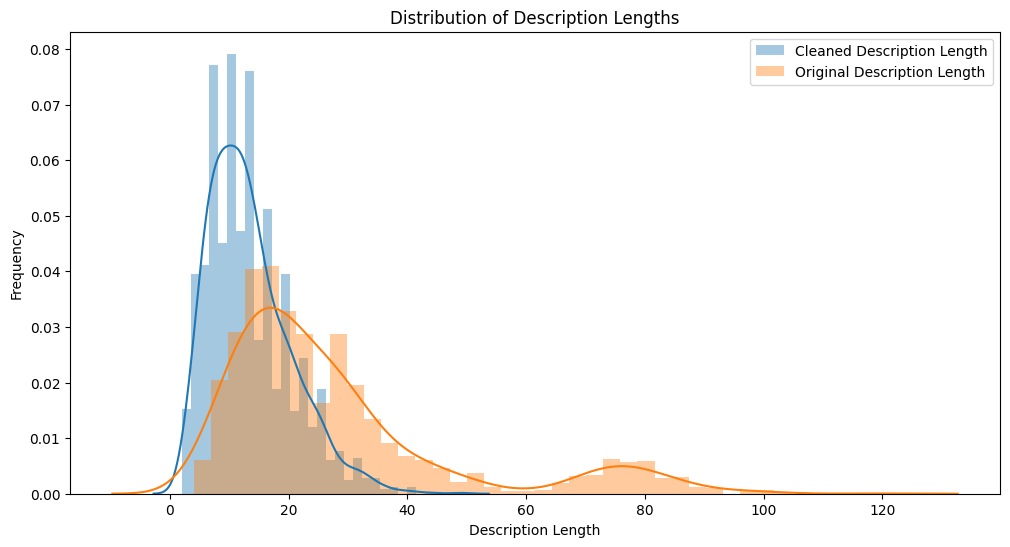

In [287]:
# Create the distplot
plt.figure(figsize=(12, 6))
sns.distplot(occ_df['cleaned_description_length'], label="Cleaned Description Length")
sns.distplot(occ_df['description_length'], label="Original Description Length")
plt.legend()
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')

## **Step 4: Final Word Frequency Analysis**

In [288]:
# ---- WORD FREQUENCY ANALYSIS ----
all_words = " ".join(occ_df["cleaned_description"]).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(50)

In [289]:
for i,j in common_words:
  print(i)

specialisation
care
health
equipment
specialist
product
production
machine
material
repair
engineering
tool
manager
provide
elsewhere
classified
plant
technology
operates
patient
available
competency
routine
test
core
information
human
medical
treat
good
school
directs
program
conduct
work
research
direct
maintains
physical
operator
including
using
professional
disease
farm
sale
student
community
study
process


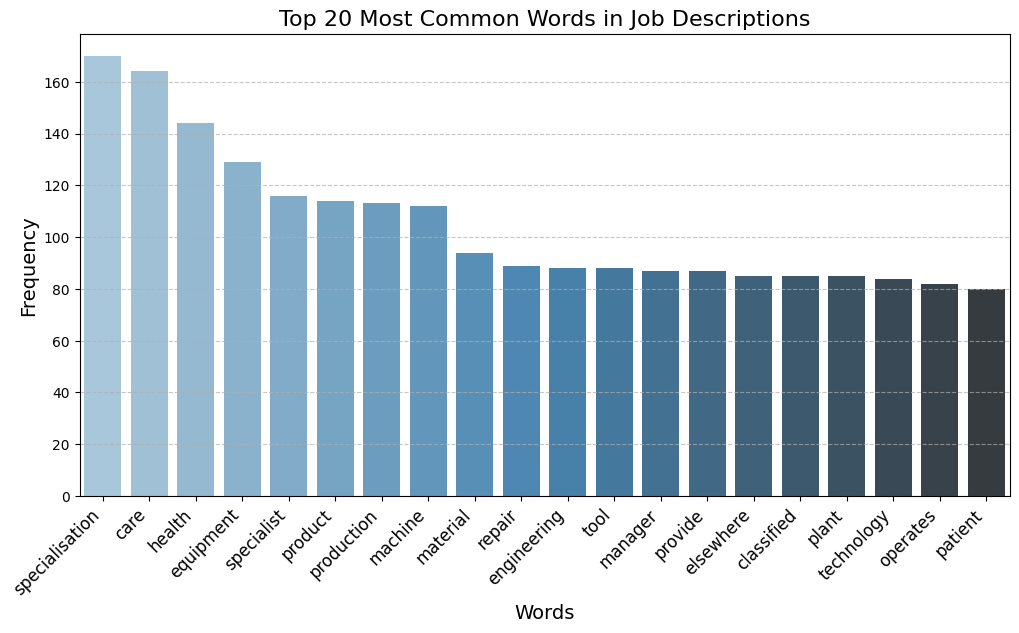

In [290]:
# Get the top 20 most common words
top_words = word_freq.most_common(20)

# Extract words and their frequencies
words, frequencies = zip(*top_words)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(frequencies), palette="Blues_d")

# Formatting
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Words", fontsize=14)
plt.title("Top 20 Most Common Words in Job Descriptions", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)

Text(0.5, 1.0, 'Cleaned Word Cloud of Job Descriptions')

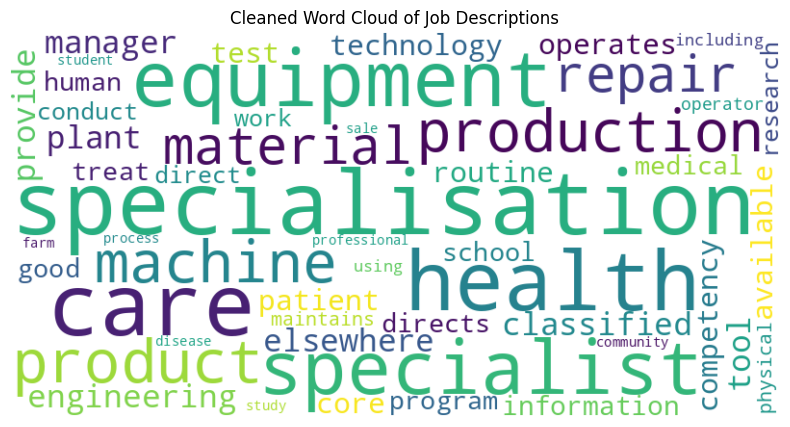

In [291]:
# Generate Word Cloud
wordcloud = WordCloud(max_words=50,width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_freq)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Cleaned Word Cloud of Job Descriptions")

### **INSIGHTS:**

From the most frequent words we find some key themes in Australian occupations:

- Healthcare & Medical Roles – Words like health, patient, medical, disease, treat suggest a strong presence of healthcare-related professions, aligning with Australia's demand for medical workers.

- Engineering & Technical Fields – Terms such as engineering, material, tool, machine, repair, technology, equipment highlight the significance of technical and manufacturing roles, emphasizing Australia’s industrial workforce.

- Education & Research – The presence of student, school, study, research, program suggests that education and research-based roles are prominent, indicating a focus on knowledge-based industries.

- Management & Operations – Words like manager, professional, directs, maintains, process, competency indicates that leadership and operational skills are crucial across sectors.

- Agriculture & Trade – Terms like farm, sale, plant, production point to the relevance of agriculture, retail, and supply chain industries in Australia.

#6. **TF-IDF Analysis**

After conducting word frequency analysis, TF-IDF analysis is applied to highlight **unique and contextually important words** in the cleaned_description column. While word frequency analysis identifies the most common words, TF-IDF refines this by giving higher weight to words that are frequent in specific descriptions but rare across the entire dataset. This reduces the influence of common words and emphasizes **distinctive terms** that are more relevant to the specific roles. Thus TF-IDF helps to identify key skills and tasks, making the analysis more precise and insightful for understanding critical competencies in data science and AI.

In [292]:
# Sample job descriptions dataset
job_descriptions = occ_df["cleaned_description"].astype(str).tolist()
stop_words.extend(custom_stopwords)
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=20, stop_words=stop_words)

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(job_descriptions)

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display top words with highest TF-IDF scores
print("\nTop TF-IDF Words:\n", tfidf_df.mean().sort_values(ascending=False))


Top TF-IDF Words:
 specialisation    0.070838
equipment         0.052074
care              0.045219
repair            0.043408
product           0.042469
health            0.041377
material          0.040146
production        0.039178
provide           0.038118
machine           0.036324
operates          0.033874
specialist        0.031590
plant             0.030168
patient           0.026782
engineering       0.026328
manager           0.025053
tool              0.023067
technology        0.022106
classified        0.021926
elsewhere         0.021926
dtype: float64


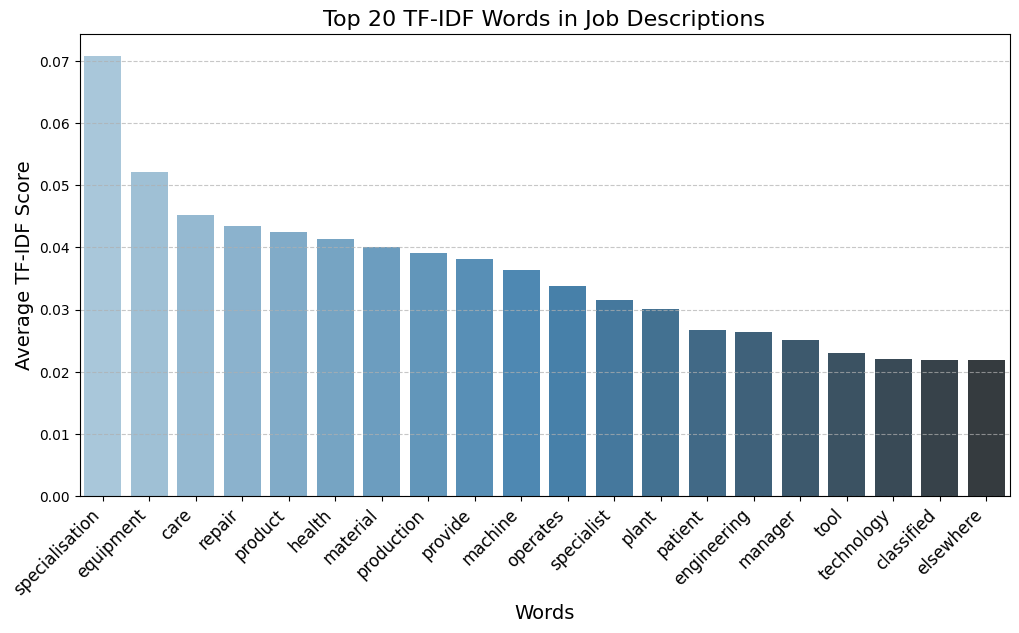

In [293]:
# Compute mean TF-IDF scores for each word
tfidf_means = tfidf_df.mean().sort_values(ascending=False)

#BAR CHART: Top 20 TF-IDF Words
plt.figure(figsize=(12, 6))
sns.barplot(x=tfidf_means.index, y=tfidf_means.values, palette="Blues_d")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Average TF-IDF Score", fontsize=14)
plt.xlabel("Words", fontsize=14)
plt.title("Top 20 TF-IDF Words in Job Descriptions", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)

Text(0.5, 1.0, 'TF-IDF Word Cloud')

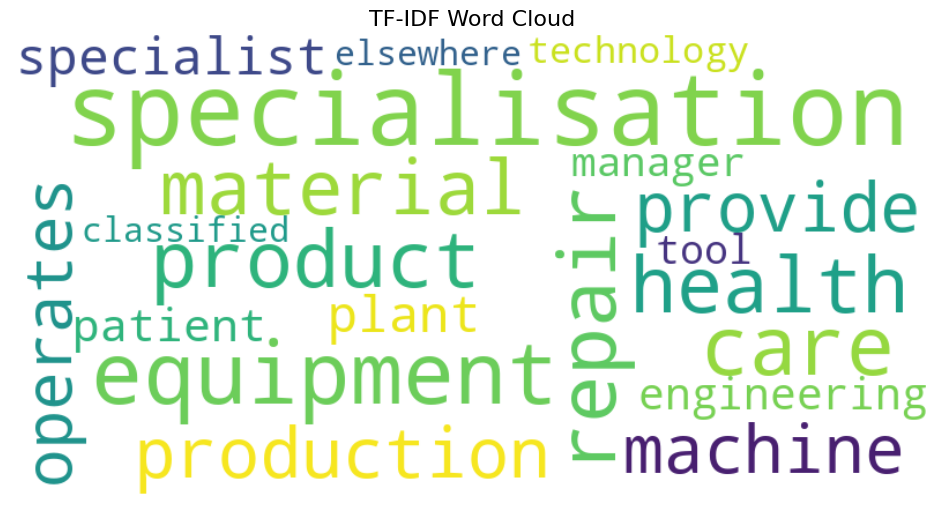

In [294]:
#WORD CLOUD: TF-IDF Weighted Words
word_scores = dict(zip(tfidf_means.index, tfidf_means.values))

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_scores)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Word Cloud", fontsize=16)

### **INSIGHTS:**

1. **Specialization**: Words like **specialisation**, **specialist**, and **engineering** highlight the importance of specialized knowledge and expertise in roles.
   
2. **Industry-Specific**: Terms such as **equipment**, **repair**, **material**, and **machine** point to technical or industrial roles involving hands-on work.

3. **Healthcare Focus**: Words like **care**, **health**, **patient**, and **product** suggest a strong presence of healthcare-related roles.

4. **Management & Operations**: Terms like **manager**, **plant**, **production**, and **operates** indicate roles with managerial and operational responsibilities.

5. **Technology**: **Technology**, **machine**, and **tool** shows the importance of advanced technology and machinery in certain roles.

#7. **N-Gram Analysis**

N-Gram analysis helps uncover meaningful word combinations and contextual relationships in job descriptions. It helps to find how specific skills and tasks are described together, identifying key skill sets like "data analysis," "machine learning" etc... It also helps capture industry-specific terminology, improve text classification, and spot emerging trends in job roles. By analyzing word pairings or sequences, N-Gram analysis provides a deeper understanding of job requirements and enhances workforce planning and skill identification.

In [295]:
text_data = " ".join(occ_df["cleaned_description"]).lower()
tokens = word_tokenize(text_data)

# Generate Bigrams and Trigrams
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Count frequency
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

In [296]:
# Top 50 bigrams & trigrams
top_bigrams = bigram_freq.most_common(50)
top_trigrams = trigram_freq.most_common(50)

In [297]:
print("Top 50 Bigrams:")
for i,j in top_bigrams:
  print(" ".join(i))

Top 50 Bigrams:
elsewhere classified
technology tool
classified core
core competency
competency specialist
specialist technology
tool available
nursing care
machine operator
human resource
registered nurse
diagnosis treat
operates machine
health care
care patient
sale assistant
engineering production
manager organise
organise direct
excluded unit
film television
high level
motor vehicle
requires high
personal commitment
place formal
formal qualification
qualification experience
engineering technologist
social emotional
commitment interest
interest place
secondary school
treat disease
level creative
creative talent
talent personal
installs maintains
investigates diagnosis
school teacher
maintains repair
operate tend
commercial industrial
primary school
subject within
within prescribed
set operate
production machine
farming breed
breed raise


In [298]:
print("Top 50 Trigrams:")
for i,j in top_trigrams:
  print(" ".join(i))

Top 50 Trigrams:
elsewhere classified core
classified core competency
core competency specialist
competency specialist technology
specialist technology tool
technology tool available
requires high level
place formal qualification
formal qualification experience
personal commitment interest
commitment interest place
interest place formal
high level creative
level creative talent
creative talent personal
talent personal commitment
manager organise direct
subject within prescribed
farming breed raise
professional elsewhere classified
production machine operator
physical human resource
nursing care patient
investigates diagnosis treat
installs maintains repair
including physical human
student social emotional
social emotional intellectual
emotional intellectual physical
intellectual physical development
care supervision child
hire train supervise
train supervise farm
supervise farm contract
farm contract carry
contract carry daytoday
carry daytoday managed
daytoday managed engage
work call

Text(0.5, 1.0, 'WordCloud of Most Common Bigrams in Job Descriptions')

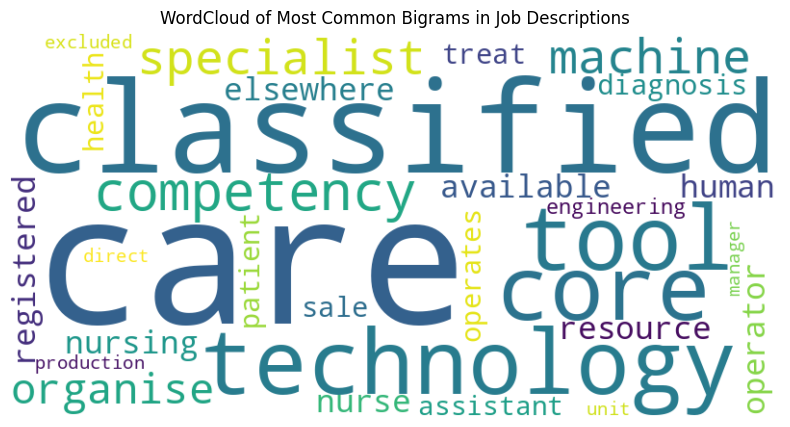

In [299]:
# Visualization: WordCloud for Bigrams
bigram_phrases = [' '.join(bg) for bg, _ in bigram_freq.most_common(20)]
bigram_text = ' '.join(bigram_phrases)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Most Common Bigrams in Job Descriptions")

Text(0.5, 1.0, 'WordCloud of Most Common Trigrams in Job Descriptions')

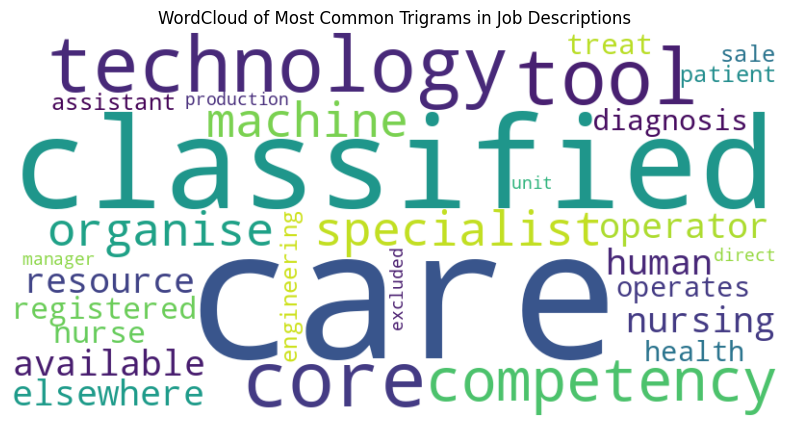

In [300]:
# Visualization: WordCloud for Bigrams
trigram_phrases = [' '.join(tri) for tri, _ in trigram_freq.most_common(20)]
trigram_text = ' '.join(trigram_phrases)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Most Common Trigrams in Job Descriptions")

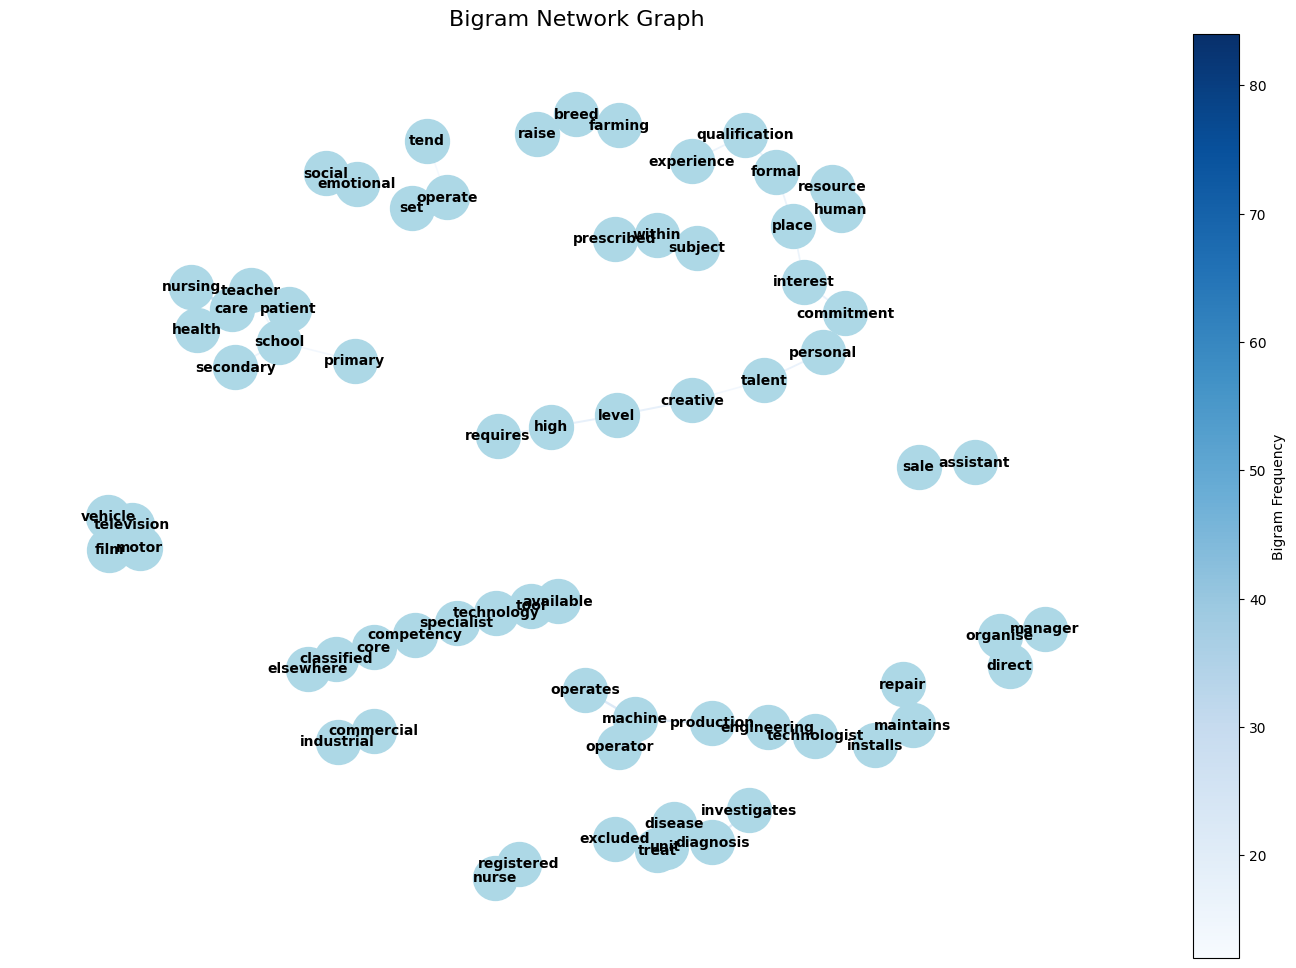

In [301]:
from nltk import bigrams

def plot_bigram_network(tokens, n=50):
    # Generate bigrams
    bi_grams = list(bigrams(tokens))

    # Count bigram frequencies
    bigram_freq = Counter(bi_grams)

    # Create network graph
    G = nx.Graph()

    # Lists for edge properties
    edge_width = []
    edge_color = []

    # Add edges based on frequency
    for (word1, word2), count in bigram_freq.most_common(n):
        G.add_edge(word1, word2, weight=count)
        edge_width.append(count)  # Store frequency for width
        edge_color.append(count)  # Store frequency for color

    # Normalize edge width for better visualization
    edge_width = np.array(edge_width)
    edge_width = 1 + (edge_width - edge_width.min()) * 5 / (edge_width.max() - edge_width.min())  # Scale between 1 and 6

    # Normalize edge colors for colormap
    edge_norm = plt.Normalize(vmin=min(edge_color), vmax=max(edge_color))
    edge_colors_mapped = plt.cm.Blues(edge_norm(edge_color))  # Convert values to RGBA

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(16, 12))  # Explicitly create figure and axis

    # Compute node positions
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', ax=ax)

    # Draw edges with normalized colors
    nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_colors_mapped, ax=ax)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", ax=ax)

    # Set title and remove axis
    ax.set_title('Bigram Network Graph', fontsize=16)
    ax.axis('off')

    # Add a colorbar with explicit axis
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=edge_norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Bigram Frequency', fontsize=10)

# Run the function with cleaned tokenized text
plot_bigram_network(tokens)


### **INSIGHTS:**

- **Technical and Healthcare Roles**: A significant number of bigrams and trigrams are related to healthcare, technical, and engineering roles, such as "nursing care," "specialist technology," and "machine operator".
- **Educational and Supervisory Focus**: Many trigrams emphasize training, supervision, and qualification, indicating the importance of leadership and education in various industries.
- **Personal Attributes and Commitment**: Phrases like "personal commitment interest" highlight the growing importance of personal passion and commitment to the job, especially in roles like healthcare, teaching, and management.
- **Emerging Skills**: The presence of terms like "creative talent" and "high level creative" signals a growing demand for creativity and high-level cognitive skills across industries.


#8. **Topic Modeling**

Topic Modeling is essential in analysing job trends because it helps to uncover hidden themes, complex patterns and relationships within large datasets. It performs grouping on related terms as topics which helps to interpret and classify the data easily.By identifying emerging trends and skill demands, topic modeling aids in workforce planning and recruitment, highlighting competencies required for different roles. It improves text classification, automates job matching, and allows for efficient analysis of large datasets, providing actionable insights without manual review. Ultimately, it helps organizations stay ahead of industry shifts and better align job descriptions with the skills in demand. Also topic model gives different outputs on each time they run,so to overcome this problem we have fixed the random.seed and random_state as 42. This ensures that we get the same result on every run.

In [302]:
occ_df["cleaned_desc"] = occ_df["cleaned_description"].apply(lambda x: word_tokenize(x))
# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(occ_df["cleaned_desc"])
corpus = [dictionary.doc2bow(text) for text in occ_df["cleaned_desc"]]

# Set a fixed random seed for reproducibility
np.random.seed(42)
gensim.utils.random.seed(42)

# Apply LDA with 5 topics
lda_model = models.LdaModel(corpus, num_topics=7, id2word=dictionary, passes=10, random_state=42)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.011*"product" + 0.010*"school" + 0.010*"structure" + 0.009*"engineering" + 0.009*"metal" + 0.008*"production" + 0.008*"material" + 0.008*"student" + 0.008*"physical" + 0.006*"directs"
Topic 1: 0.015*"plant" + 0.014*"crop" + 0.010*"hotel" + 0.009*"routine" + 0.009*"ensure" + 0.009*"repair" + 0.007*"maintains" + 0.006*"care" + 0.006*"standard" + 0.005*"cultivating"
Topic 2: 0.025*"specialist" + 0.023*"tool" + 0.023*"classified" + 0.023*"elsewhere" + 0.022*"technology" + 0.021*"available" + 0.020*"core" + 0.020*"competency" + 0.010*"machine" + 0.008*"sale"
Topic 3: 0.031*"health" + 0.027*"care" + 0.015*"treat" + 0.014*"patient" + 0.012*"specialisation" + 0.010*"disorder" + 0.010*"nursing" + 0.009*"disease" + 0.009*"nurse" + 0.008*"diagnosis"
Topic 4: 0.010*"information" + 0.008*"engineering" + 0.008*"food" + 0.007*"operates" + 0.007*"farm" + 0.006*"personal" + 0.006*"level" + 0.006*"prepares" + 0.006*"place" + 0.006*"plant"
Topic 5: 0.012*"security" + 0.009*"good" + 0.008*"fina

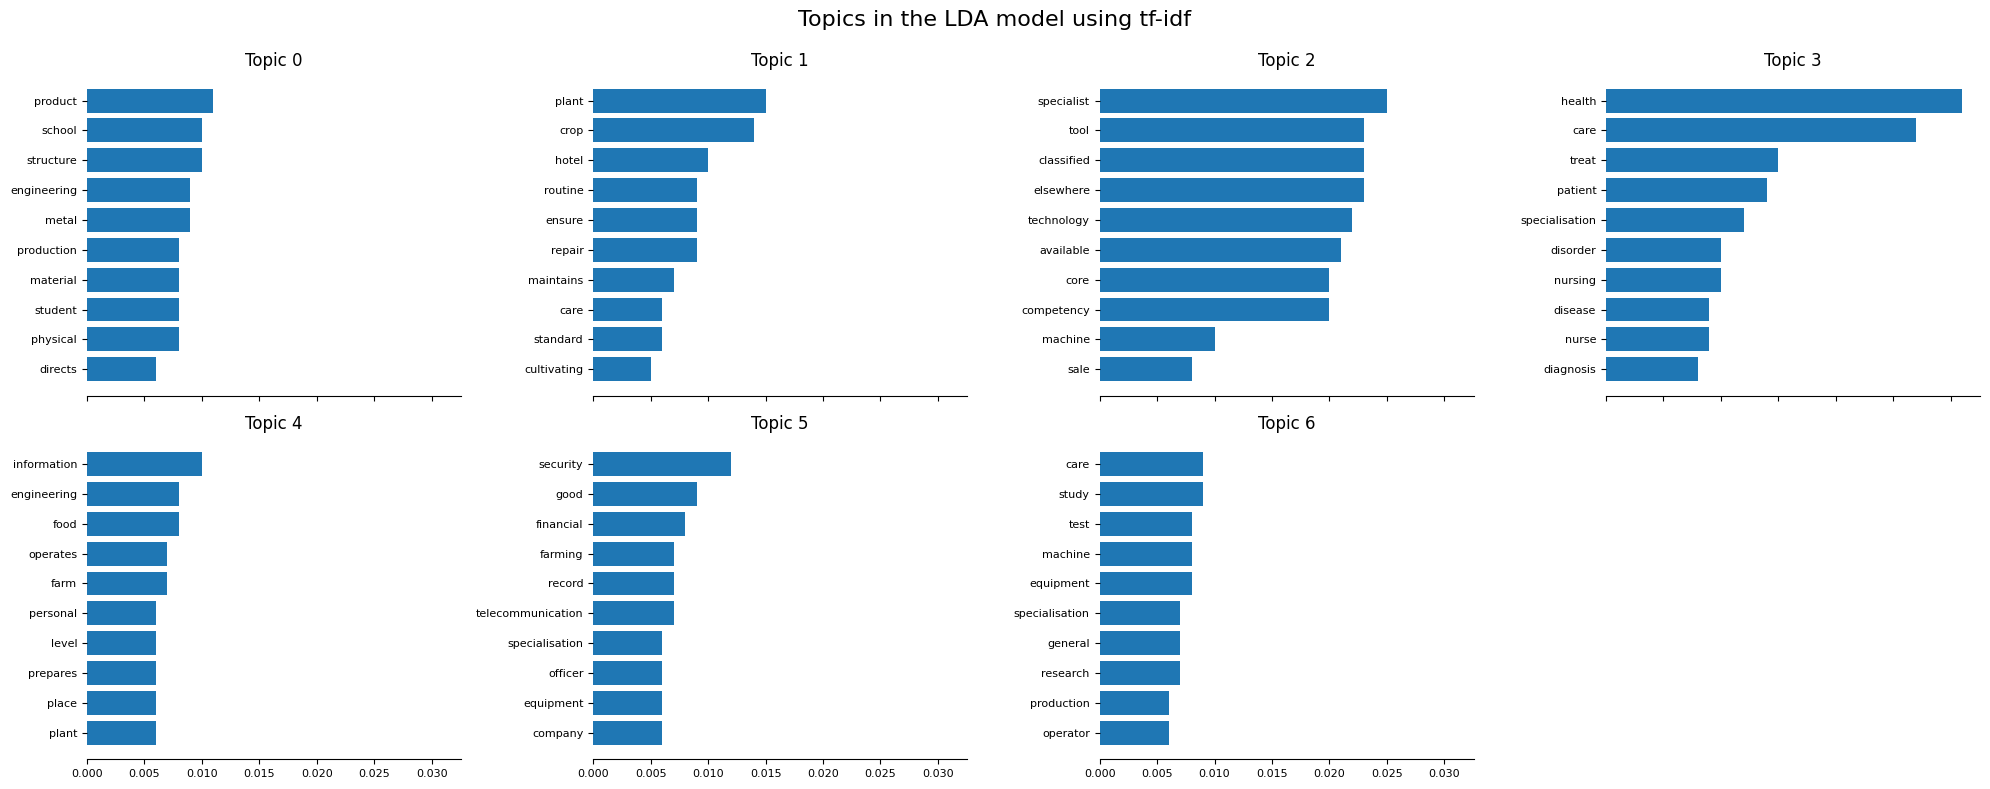

In [303]:
# Visualize the topics in bar plots
def plot_top_words(model, feature_names, n_top_words, title):
    # Get the number of topics
    num_topics = len(model.print_topics(-1))

    # Calculate the number of rows and columns for subplots
    num_cols = min(4, num_topics)  # Maximum 4 columns
    num_rows = math.ceil(num_topics / num_cols)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), sharex=True)
    axes = axes.flatten() if num_topics > 1 else [axes]

    for topic_idx, topic in model.print_topics(-1):
        # Use regex to extract words and weights
        words_weights = re.findall(r'(0\.\d+)\*"(.+?)"', topic)

        if words_weights:
            weights, words = zip(*words_weights)
            weights = [float(w) for w in weights]
        else:
            print(f"No matches found for topic {topic_idx}")
            continue

        ax = axes[topic_idx]
        ax.barh(words[:n_top_words], weights[:n_top_words])
        ax.set_title(f'Topic {topic_idx}')
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=8)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)

    # Hide any unused subplots
    for idx in range(num_topics, len(axes)):
        axes[idx].set_visible(False)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust to prevent title overlap

plot_top_words(lda_model, dictionary.values(), n_top_words=10, title='Topics in the LDA model using tf-idf')

In [304]:
# Enable the display of visualizations in IPython Notebooks
pyLDAvis.enable_notebook()

# Prepare and transform and LDA model
pyLDAvis_data = prepare(lda_model, corpus, dictionary)

In [305]:
pyLDAvis.display(pyLDAvis_data)

### **INSIGHTS:**
- Topic 0: Engineering and Education
  - This topic is centered around engineering and education-related terms. Words like "product," "school," "structure," and "student" suggest roles involving the production or design of educational or structural materials.
  - The focus is on technical skills (e.g., "engineering," "metal," "production," and "material"), potentially indicating roles in educational institutions or engineering-based industries.
- Topic 1: Agricultural and Routine Management
  - This topic is related to roles in agriculture and facility management, with terms like "plant," "crop," "hotel," "routine," and "repair."
  - It suggests a mix of agricultural responsibilities ("crop," "plant," "cultivating") and operational or maintenance tasks in environments like hotels or similar settings ("routine," "repair," "standard").
- Topic 2: Specialized Competency and Technology
  - This topic emphasizes specialized roles requiring specific competencies and knowledge in technology.
  - Words like "specialist," "tool," "technology," "competency," and "machine" point to highly skilled positions, possibly in technical fields or industries where precise tools and technologies are crucial. It reflects roles that require expertise and the ability to work with advanced technologies or specialized tools.
- Topic 3: Healthcare and Nursing
  - Focused on healthcare and medical fields, this topic highlights roles in nursing and patient care.
  - Terms like "health," "care," "patient," "nurse," and "diagnosis" point to occupations in healthcare, where treatment, diagnosis, and care of patients are central responsibilities. It indicates the importance of medical specialization and care for various disorders.
- Topic 4: Engineering, Information, and Agriculture
  - This topic combines roles involving engineering, information, and agriculture.
  - Terms like "information," "engineering," "food," and "farm" suggest positions that require both technical and agricultural knowledge, possibly related to food production, agricultural engineering, or systems involved in farming operations.
- Topic 5: Security, Finance, and Telecommunication
  - Roles in security, finance, and telecommunication dominate this topic.
  - The words "security," "financial," "company," "telecommunication," and "farming" indicate jobs related to managing security measures, financial records, or telecommunications infrastructure. This may also include roles in the agricultural sector ("farming") with an overlap in technology or infrastructure management.
- Topic 6: Research, Equipment, and Specialized Care
  - This topic highlights roles involving research, specialization, and the use of equipment.
  - Keywords like "care," "study," "test," "machine," and "research" suggest positions related to scientific or medical research, possibly in laboratory settings or technical fields requiring specialized knowledge in testing and equipment management.

#9. **Clustering**

Clustering is important for the job analysis because it helps to group the similar job roles based on their shared attributes which makes it easier to identify trends and patterns. It aids in efficient data segmentation, enhances job matching and gives dynamic insights into the job market.

In [306]:
skill_df.head()

Occupation Type  ANZSCO Code Sub-Profile Code                             ANZSCO Title  \
0        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
1        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
2        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
3        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   
4        ANZSCO 4         1111              NaN  Chief Executives and Managing Directors   

                                                         Specialist Task  % of time spent on task  \
0                    Direct or manage financial activities or operations                   0.1302   
1                         Direct department or organisational activities                   0.1117   
2                 Direct sales, marketing or customer service activities                   0.0808   
3  Communicate with others to arrange, coordinate, or conduct activities                   0.0665   
4            Analyse data to assess operational or project effectiveness                   0.0651   

  Emerging/\nTrending Flag                                  Specialist Cluster  \
0                      NaN  Manage, monitor and undertake financial activities   
1                 Trending                Manage services, staff or activities   
2                      NaN                Manage services, staff or activities   
3                      NaN              Communicate or collaborate with others   
4                      NaN            Use data to inform operational decisions   

    % of time spent on cluster                                Cluster Family  \
0                       0.1644  Business operations and financial activities   
1                       0.2128  Business operations and financial activities   
2                       0.2128  Business operations and financial activities   
3                       0.0750               Communication and collaboration   
4                       0.1009                Data, analytics, and databases   

   % of time spent on family  \
0                     0.5322   
1                     0.5322   
2                     0.5322   
3                     0.0890   
4                     0.1370   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Skills Statement  
0                                                                                                                                                                 Direct and oversee the financial operations of a business, organisation, operation, or project, such as budgeting, accounting, financial reporting, and risk management. This may include providing specialist or technical knowledge and guidance or undertaking general project management tasks to ensure service goals, timelines and budgets are met - such as managing staff and resource allocation; providing supervision, guidance and direction; and ensuring legislative or regulatory requirements are adhered to.  
1                                                                                                                                                                                                                                                                 Direct and oversee the activities of a work unit, department, or or

In [307]:
# Convert text data (e.g., job descriptions, skills) into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(skill_df['Skills Statement'])

Text(0.5, 1.0, 'Elbow Method for Optimal K')

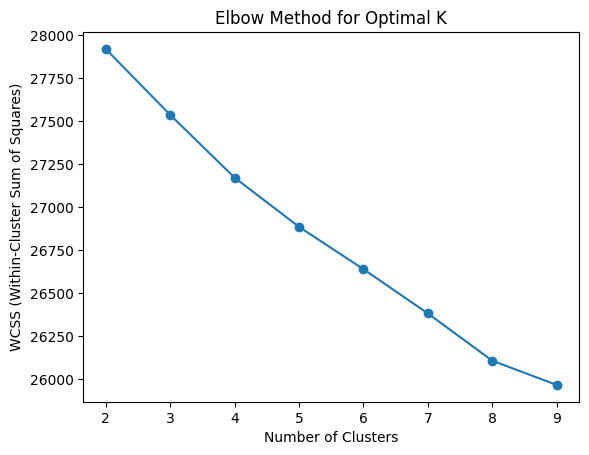

In [308]:
# Find the optimal K using Elbow Method
wcss = []
for k in range(2, 10):  # Testing different K values
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")

Text(0.5, 1.0, 'Silhouette Method')

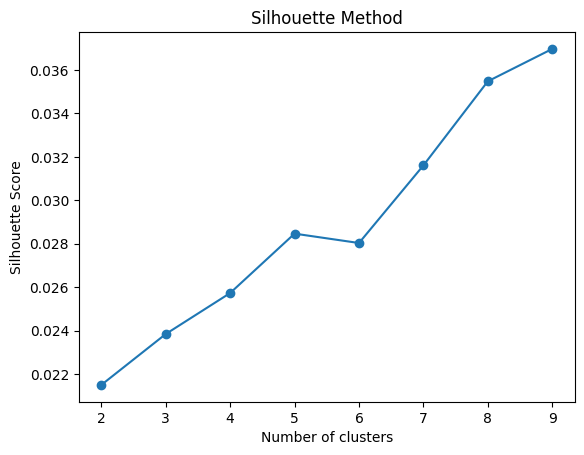

In [309]:
# Function to plot the Silhouette Method
silhouette_avg_scores = []
k_range = range(2,10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_avg_scores.append(silhouette_avg)
plt.figure()
plt.plot(k_range, silhouette_avg_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')


In [310]:
# Fit K-Means with the optimal K
optimal_k = 5  # Choose based on elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
skill_df["cluster"] = kmeans.fit_predict(X)

# Print sample clusters
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    print(skill_df[skill_df["cluster"] == i]["Skills Statement"].head(10))  # Display top 10


Cluster 0:
69     Perform inspections or tests of equipment or systems to ensure safety, proper functioning, and compliance with relevant codes or standards, or to locate damage, defects, or wear. Ensure to examine any components, connections, or mechanisms and assess equipment for wear, damage, loss of structural integrity, faults, malfunctions, or improper functioning. This may include visual inspection, using touch or force, conducting tests, or using diagnostic tools and equipment. Follow operational procedures for further action such as reporting, correction, adjustment, repair, maintenance, or decommissioning.
70                                                                                           Maintain equipment used for forestry, hunting or agricultural activities to optimise performance of equipment and ensure safety. Use tools and supplies to remove and replace parts, clean, adjust, sharpen, and repair equipment as required. Dispose of waste and equipment that is no l

In [311]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, skill_df["cluster"])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.028463649004172822


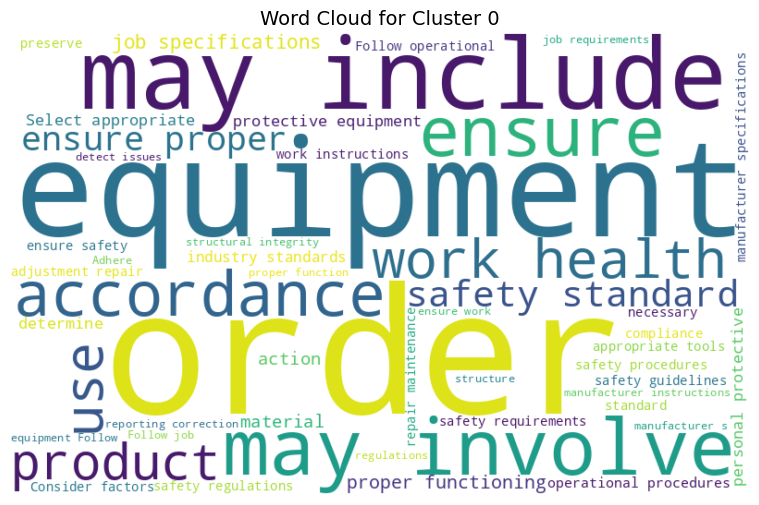

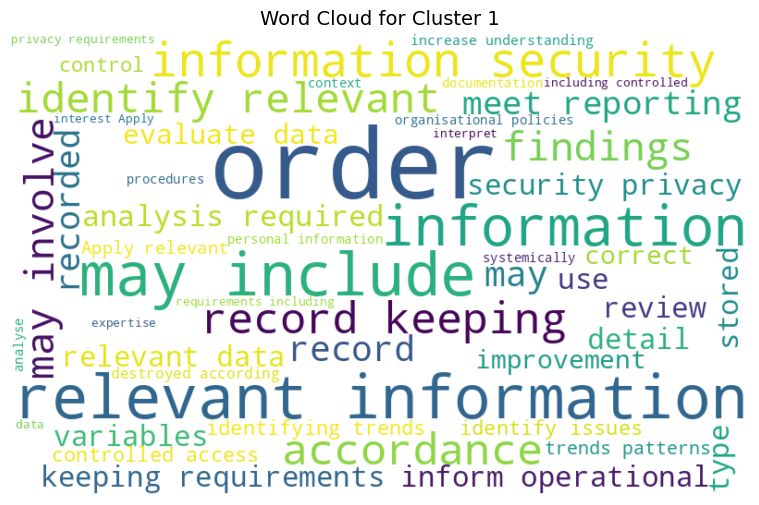

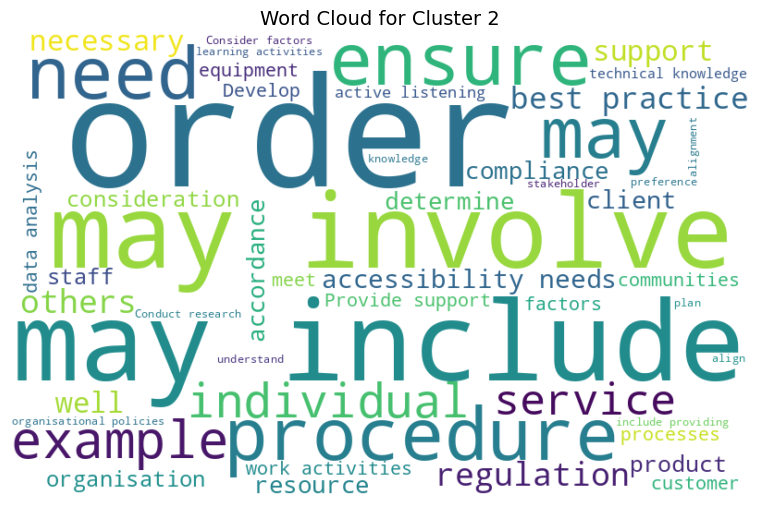

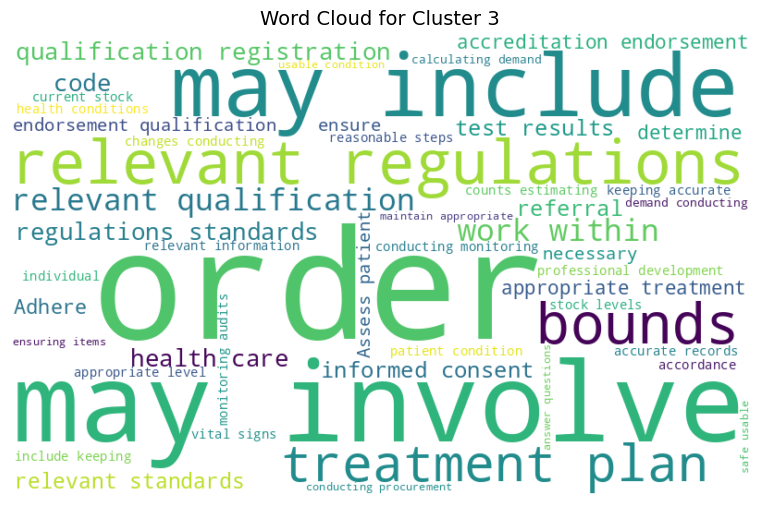

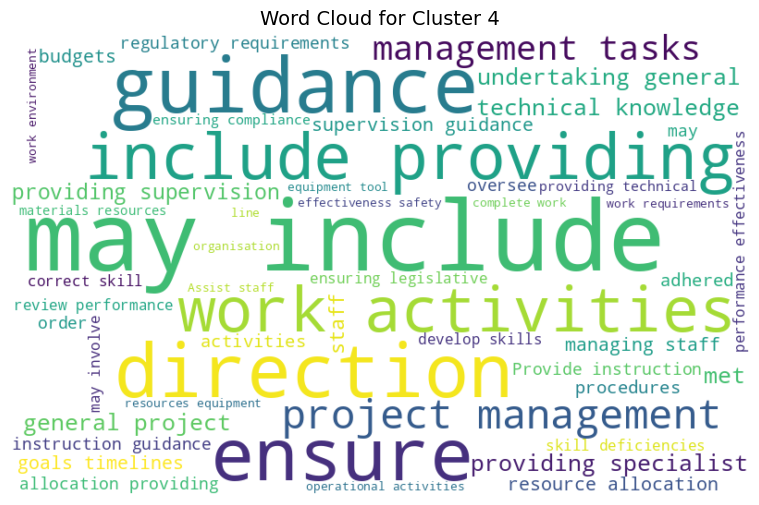

In [312]:
# Loop through each cluster and display word cloud separately
for i in range(optimal_k):
    # Extract text from the cluster
    cluster_text = " ".join(skill_df[skill_df["cluster"] == i]["Skills Statement"].dropna())
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=500, background_color="white",max_words=50).generate(cluster_text)
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {i}", fontsize=14)

In [313]:
# Reduce dimensionality using UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)

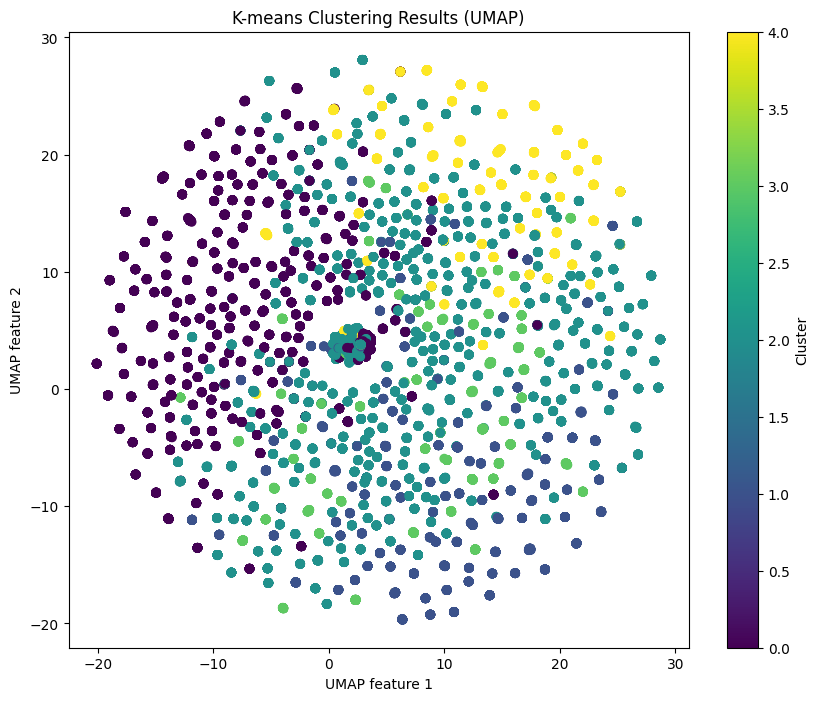

In [314]:
#Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering Results (UMAP)')
plt.xlabel('UMAP feature 1')
plt.ylabel('UMAP feature 2')
plt.colorbar(scatter, label='Cluster')

### **INSGHTS:**

- **Cluster 0**
  - It includes job roles focused on equipment maintenance, inspections, and safety in sectors like agriculture and forestry.
  -  The cluster highlights skills in equipment handling, risk management, and performing agricultural tasks like grading and sowing.
- **Cluster 1**
  - It focuses on analytical, financial, and communication-related tasks.
  - It includes skills in data analysis, risk assessment, financial reporting, and compliance monitoring.
- **Cluster 2**
  - It focuses on strategic planning, financial management, stakeholder engagement, and regulatory compliance.
  - It includes skills in data analysis for performance evaluation, business and financial planning, budgeting, contract negotiation, and policy implementation.
- **Cluster 3**
  - It focuses on inventory management, emergency response, and professional skill maintenance.
  - It includes skills related to tracking and maintaining stock levels, conducting audits, and ensuring the usability of resources and equipment.
- **Cluster 4**
  - It focuses on leadership, management, and oversight.
  - It includes directing financial, operational, sales, HR, and research activities, ensuring compliance with regulations, and managing budgets, resources, and timelines.

  From this analysis we have got a silhouette score of 0.0285 which indicates the overlap in the clusters we can see this in the Scatterplot.

#10. **Similarity Analysis**

The aim of this analysis is to find is there any similar job roles between European dataset(esco_df) and Australian Dataset(occ_df). We will be using two text similarity techniques Tf-IDF with Cosine Similrity and Bidirectional Encoder Representations from Transformers(BERT) Embeddings. By computing similarity scores we try to identify closely related job roles between these taxonomies and understand how skills ans job roles align globally. First we explore the European dataset(esco_df) and then proceed with the similarity analysis.

##10.1. **ESCO Dataset**

In [315]:
esco_df=pd.read_csv("occupations_en.csv")

In [316]:
esco_df.head()

conceptType                                                                  conceptUri  \
0  Occupation  http://data.europa.eu/esco/occupation/00030d09-2b3a-4efd-87cc-c4ea39d27c34   
1  Occupation  http://data.europa.eu/esco/occupation/000e93a3-d956-4e45-aacb-f12c83fedf84   
2  Occupation  http://data.europa.eu/esco/occupation/0019b951-c699-4191-8208-9822882d150c   
3  Occupation  http://data.europa.eu/esco/occupation/0022f466-426c-41a4-ac96-a235c945cf97   
4  Occupation  http://data.europa.eu/esco/occupation/002da35b-7808-43f3-83bf-63596b8b351f   

   iscoGroup                  preferredLabel  \
0       2654              technical director   
1       8121  metal drawing machine operator   
2       7543      precision device inspector   
3       3155   air traffic safety technician   
4       2431     hospitality revenue manager   

                                                                                                                                                                                                                                                                                                                                                                                       altLabels  \
0                                                                                                                                                                                                                                        technical and operations director\nhead of technical\ndirector of technical arts\nhead of technical department\ntechnical supervisor\ntechnical manager   
1                                                                                                  metal drawing machine technician\nmetal drawing machine operative\nwire drawer\ndraw machine operative\nforming machine technician\ndraw machine operator\nwiredrawing setter\nwirer drawer machine operator\nforming machine operative\ndraw machine technician\nwiredrawing  machine tender   
2  inspector of precision instruments\nprecision device quality control supervisor\nprecision instrument QC inspector\nprecision instrument quality control inspector\nprecision device QC inspector\nprecision device quality assurance supervisor\nprecision device quality control inspector\ninspector of precision devices\nprecision instrument inspector\nprecision instrument supervisor   
3                                                                                        air traffic safety electronics hardware specialist\nair traffic safety software specialist\nair traffic safety engineer\nair traffic safety hardware specialist\nair traffic safety electronics software specialist\nair traffic safety electronics engineer\nair traffic safety electronics technician   
4                                                                                                                                                                                                                                                                          hospitality revenues manager\nyield manager\nhospitality yields manager\nhospitality revenue manager\nrevenue manager   

  hiddenLabels    status              modifiedDate  \
0          NaN  released  2024-01-25T11:28:50.295Z   
1          NaN  released  2024-01-23T10:09:32.099Z   
2          NaN  released  2024-01-25T15:00:12.188Z   
3          NaN  released  2024-01-29T16:01:13.998Z   
4          NaN  released  2024-01-11T10:28:45.871Z   

                                        regulatedProfessionNote scopeNote definition  \
0  http://data.europa.eu/esco/regulated-professions/unregulated       NaN        NaN   
1  http://data.europa.eu/esco/regulated-professions/unregulated       NaN        NaN   
2  http://data.europa.eu/esco/regulated-professions/unregulated       NaN        NaN   
3  http://data.europa.eu/esco/regulated-professions/unregulated       NaN        NaN   
4  http://data.europa.eu/esco/regulated-professions/unregula

In [317]:
esco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conceptType              3039 non-null   object
 1   conceptUri               3039 non-null   object
 2   iscoGroup                3039 non-null   int64 
 3   preferredLabel           3039 non-null   object
 4   altLabels                3011 non-null   object
 5   hiddenLabels             8 non-null      object
 6   status                   3039 non-null   object
 7   modifiedDate             3039 non-null   object
 8   regulatedProfessionNote  3039 non-null   object
 9   scopeNote                307 non-null    object
 10  definition               8 non-null      object
 11  inScheme                 3039 non-null   object
 12  description              3039 non-null   object
 13  code                     3039 non-null   object
dtypes: int64(1), object(13)
memory usage: 33

In [318]:
esco_df.describe()

iscoGroup
count  3039.000000
mean   4204.497203
std    2473.748755
min     110.000000
25%    2320.000000
50%    3240.000000
75%    7211.000000
max    9629.000000

In [319]:
esco_df.duplicated().sum()

0

In [320]:
esco_df.isna().sum()

conceptType                   0
conceptUri                    0
iscoGroup                     0
preferredLabel                0
altLabels                    28
hiddenLabels               3031
status                        0
modifiedDate                  0
regulatedProfessionNote       0
scopeNote                  2732
definition                 3031
inScheme                      0
description                   0
code                          0
dtype: int64

In [321]:
# Function for text preprocessing
def esco_preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

In [322]:
esco_df["cleaned_description"] = esco_df["description"].apply(esco_preprocess_text)

##10.2. **TF_IDF Analysis with Cosine Similarity**

This analysis converts job titles and descriptions into term frequency-inverse document frequency(TF-IDF) vectors and measures the cosine similarity to find the matching occupations and the least similar occupations.

In [323]:
# Extract text fields for comparison
esco_texts = esco_df["preferredLabel"].astype(str) + " " + esco_df["cleaned_description"].astype(str)
occ_texts = occ_df["ANZSCO Title"].astype(str) + " " + occ_df["cleaned_description"].astype(str)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000,ngram_range=(1,2))
esco_tfidf = vectorizer.fit_transform(esco_texts)
occ_tfidf = vectorizer.transform(occ_texts)

# Compute Cosine Similarity
similarity_matrix = cosine_similarity(occ_tfidf,esco_tfidf)

# Convert to DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix, index=occ_df["ANZSCO Title"], columns=esco_df["preferredLabel"])

In [324]:
# Find top 10 ANZSCO occupations with the highest similarity scores
top_anzsco_jobs = similarity_df.max(axis=0).nlargest(10).index  # Get top 10 ANZSCO jobs
# Find the most similar ESCO job for each ANZSCO job
top_esco_jobs = similarity_df.loc[:, top_anzsco_jobs].idxmax(axis=0)  # Get ESCO jobs with highest similarity
# Subset the similarity matrix for these pairs
top_similarity = similarity_df.loc[top_esco_jobs, top_anzsco_jobs]
# Display Top Similar Occupations
top_matches_tfidf = top_similarity.max(axis=1).sort_values(ascending=False).head(10)
print("\nTop Matching Occupations (TF_IDF):\n", top_matches_tfidf)

# Find top 10 ANZSCO occupations with the least similarity scores
last_anzsco_jobs = similarity_df.min(axis=0).nsmallest(10).index  # Get last 10 ANZSCO jobs
# Find the least similar ESCO job for each ANZSCO job
last_esco_jobs = similarity_df.loc[:, last_anzsco_jobs].idxmax(axis=0)  # Get ESCO jobs with least similarity
# Subset the similarity matrix for these pairs
least_similarity = similarity_df.loc[last_esco_jobs, top_anzsco_jobs]
# Display Top Similar Occupations
least_matches_tfidf = similarity_df.min(axis=1).sort_values(ascending=True).head(10)
print("\nLeast Similar Occupations (TF_IDF):\n", least_matches_tfidf)


Top Matching Occupations (TF_IDF):
 ANZSCO Title
Blow Moulding Machine Operator            0.857456
Dairy Products Maker                      0.837233
Bicycle Mechanic                          0.832136
Hair or Beauty Salon Manager              0.822085
Amusement Ride Operator                   0.815831
Checkout Operators and Office Cashiers    0.811905
Garden Labourer                           0.811786
Sign Erector                              0.810170
Window Cleaner                            0.807634
Dental Technician                         0.807371
dtype: float64

Least Similar Occupations (TF_IDF):
 ANZSCO Title
Chief Executives and Managing Directors              0.0
Broadcast Transmitter Operator                       0.0
Jeweller                                             0.0
Library Technician                                   0.0
Gallery or Museum Technician                         0.0
Power Generation Plant Operator                      0.0
Wind Turbine Technician         

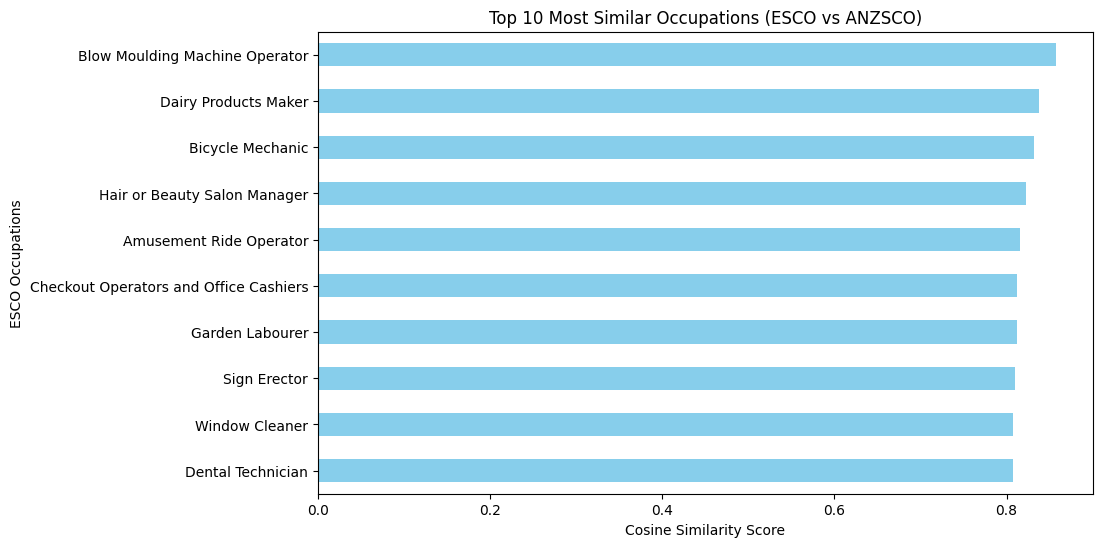

In [325]:
# Bar plot for Top Matches
top_matches_tfidf.plot(kind="barh", figsize=(10, 6), color="skyblue")
plt.xlabel("Cosine Similarity Score")
plt.ylabel("ESCO Occupations")
plt.title("Top 10 Most Similar Occupations (ESCO vs ANZSCO)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'blow moulding machine operator'),
  Text(1.5, 0, 'dairy products maker'),
  Text(2.5, 0, 'bicycle courier'),
  Text(3.5, 0, 'beauty salon manager'),
  Text(4.5, 0, 'amusement and recreation attendant'),
  Text(5.5, 0, 'cashier'),
  Text(6.5, 0, 'garden labourer'),
  Text(7.5, 0, 'sign maker'),
  Text(8.5, 0, 'window cleaner'),
  Text(9.5, 0, 'dental technician')])

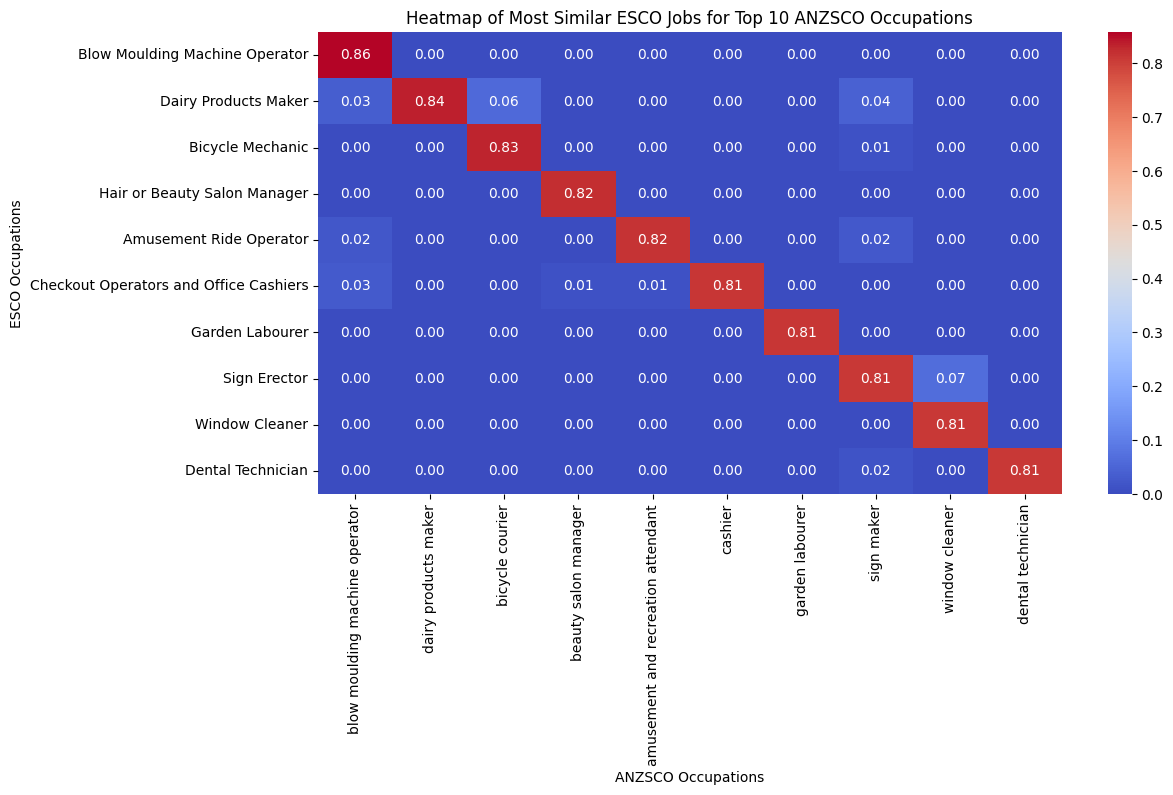

In [326]:
# Find top 10 ANZSCO occupations with the highest similarity scores
top_anzsco_jobs = similarity_df.max(axis=0).nlargest(10).index  # Get top 10 ANZSCO jobs

# Find the most similar ESCO job for each ANZSCO job
top_esco_jobs = similarity_df.loc[:, top_anzsco_jobs].idxmax(axis=0)  # Get ESCO jobs with highest similarity

# Subset the similarity matrix for these pairs
top_similarity_df = similarity_df.loc[top_esco_jobs, top_anzsco_jobs]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(top_similarity_df, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=top_anzsco_jobs, yticklabels=top_esco_jobs)
plt.title("Heatmap of Most Similar ESCO Jobs for Top 10 ANZSCO Occupations")
plt.xlabel("ANZSCO Occupations")
plt.ylabel("ESCO Occupations")
plt.xticks(rotation=90)

### **OBSERVATION:**

* Top Matching Occupations:
  - Occupations with the highest similarity (e.g., Blow Moulding Machine Operator, Amusement Ride Operator, Bicycle Mechanic) share common technical or domain-specific language.
  - Roles from similar sectors have overlapping vocabularies, indicating shared skill sets and job requirements.
* Least Similar Occupations:
  - Occupations with a similarity score of 0 (e.g., Chief Executives and Managing Directors, Jeweller, Power Generation Plant Operator) have distinct job descriptions and specialized terminology.
  - These roles belong to highly specialized sectors (e.g., leadership, technical engineering, crafts), highlighting a lack of overlap in language with more general or operational roles.

* Top matches indicate sectoral similarity, while least matches highlight clear distinctions between specialized job categories, suggesting the need for more refined taxonomies.

##10.3. **BERT Analysis**

In this analysis we are using a pre-trained BERT language model(all-MiniLM-L6-v2) which transforms the texts into dense vector representations and capture the sematic meaning of the text, making it easier to compare the meaning with different texts. Then we are using Cosine similarity to determine the similarity of the texts.

In [327]:
model = SentenceTransformer("all-MiniLM-L6-v2")
esco_embeddings = model.encode(esco_texts)
occ_embeddings = model.encode(occ_texts)
similarity_matrix_bert = cosine_similarity( occ_embeddings,esco_embeddings)

In [328]:
similarity_df_bert = pd.DataFrame(similarity_matrix_bert, columns=esco_df["preferredLabel"], index=occ_df["ANZSCO Title"])
# Find top 10 ANZSCO occupations with the highest similarity scores
top_anzsco_jobs = similarity_df_bert.max(axis=0).nlargest(10).index  # Get top 10 ANZSCO jobs
# Find the most similar ESCO job for each ANZSCO job
top_esco_jobs = similarity_df_bert.loc[:, top_anzsco_jobs].idxmax(axis=0)  # Get ESCO jobs with highest similarity
# Subset the similarity matrix for these pairs
top_similarity_bert = similarity_df_bert.loc[top_esco_jobs, top_anzsco_jobs]
# Display Top Similar Occupations
top_matches_bert = top_similarity_bert.max(axis=1).sort_values(ascending=False).head(10)
print("\nTop Matching Occupations (BERT):\n", top_matches_bert)

# Find top 10 ANZSCO occupations with the least similarity scores
last_anzsco_jobs = similarity_df_bert.min(axis=0).nsmallest(10).index  # Get last 10 ANZSCO jobs
# Find the least similar ESCO job for each ANZSCO job
last_esco_jobs = similarity_df_bert.loc[:, last_anzsco_jobs].idxmax(axis=0)  # Get ESCO jobs with least similarity
# Subset the similarity matrix for these pairs
least_similarity_bert = similarity_df_bert.loc[last_esco_jobs, top_anzsco_jobs]
# Display Top Similar Occupations
least_matches_bert = similarity_df_bert.min(axis=1).sort_values(ascending=True).head(10)
print("\nLeast Similar Occupations (BERT):\n", least_matches_bert)


Top Matching Occupations (BERT):
 ANZSCO Title
Checkout Operators and Office Cashiers    0.932330
ICT Trainer                               0.902493
Life Coach                                0.863886
Switchboard Operators                     0.860497
ICT Account Manager                       0.856525
Market Research Interviewer               0.844147
Blow Moulding Machine Operator            0.843342
Instructional Designer                    0.839717
Systems Auditor (ICT)                     0.837789
Metal Rolling Mill Operator               0.837192
dtype: float32

Least Similar Occupations (BERT):
 ANZSCO Title
Sugar Cane Grower                                  -0.252778
Osteopath                                          -0.226633
Podiatrist                                         -0.226263
Glass Blower                                       -0.223286
Library Assistant                                  -0.214297
Stagehand                                          -0.211254
Logging Assi

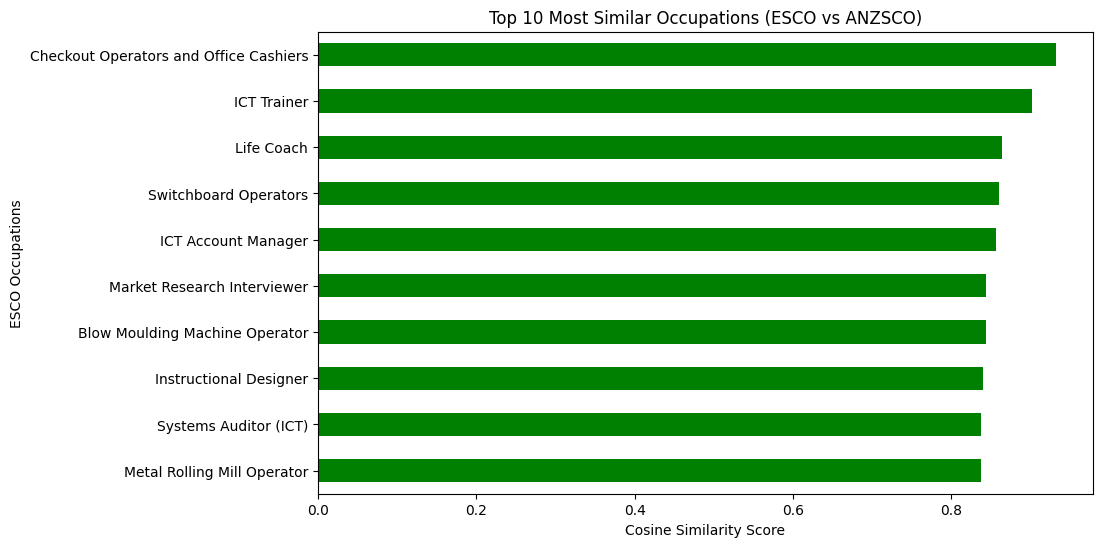

In [329]:
# Bar plot for Top Matches
top_matches_bert.plot(kind="barh", figsize=(10, 6), color="green")
plt.xlabel("Cosine Similarity Score")
plt.ylabel("ESCO Occupations")
plt.title("Top 10 Most Similar Occupations (ESCO vs ANZSCO)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'cashier'),
  Text(1.5, 0, 'ICT trainer'),
  Text(2.5, 0, 'life coach'),
  Text(3.5, 0, 'telephone switchboard operator'),
  Text(4.5, 0, 'ICT account manager'),
  Text(5.5, 0, 'market research interviewer'),
  Text(6.5, 0, 'blow moulding machine operator'),
  Text(7.5, 0, 'instructional designer'),
  Text(8.5, 0, 'ICT auditor manager'),
  Text(9.5, 0, 'metal rolling mill operator')])

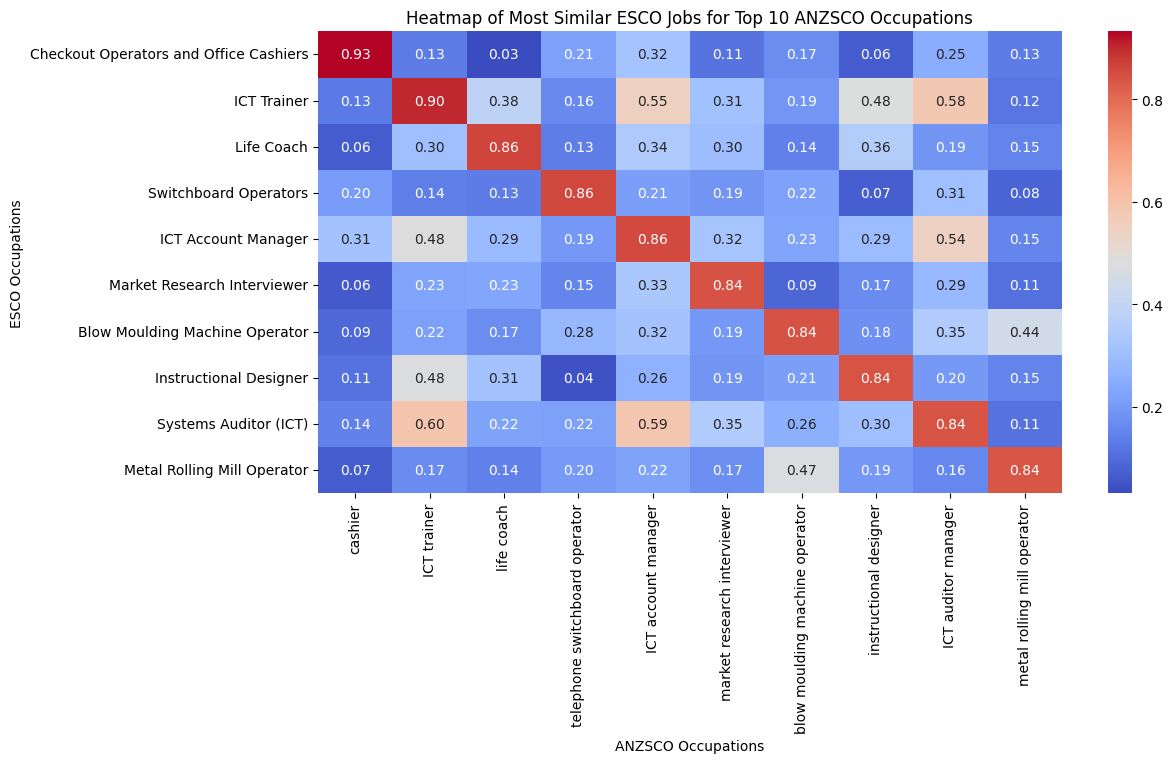

In [330]:
# Find top 10 ANZSCO occupations with the highest similarity scores
top_anzsco_jobs = similarity_df_bert.max(axis=0).nlargest(10).index  # Get top 10 ANZSCO jobs

# Find the most similar ESCO job for each ANZSCO job
top_esco_jobs = similarity_df_bert.loc[:, top_anzsco_jobs].idxmax(axis=0)  # Get ESCO jobs with highest similarity

# Subset the similarity matrix for these pairs
top_similarity_bert = similarity_df_bert.loc[top_esco_jobs, top_anzsco_jobs]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(top_similarity_bert, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=top_anzsco_jobs, yticklabels=top_esco_jobs)
plt.title("Heatmap of Most Similar ESCO Jobs for Top 10 ANZSCO Occupations")
plt.xlabel("ANZSCO Occupations")
plt.ylabel("ESCO Occupations")
plt.xticks(rotation=90)

### **OBSERVATION:**

- Top Matching Occupations (BERT):
  - Occupations like Checkout Operators and Office Cashiers, ICT Trainer, and Life Coach show high similarity, indicating that these roles share common skill sets or job descriptions, particularly in customer service, training, or communication-focused sectors.
  - Jobs in similar domains such as ICT, market research, and instructional design have overlapping professional terminology and requirements, reflecting a trend in service-oriented and tech-related occupations.
- Least Similar Occupations (BERT):
  - Occupations like Sugar Cane Grower, Osteopath, and Podiatrist have low similarity scores, reflecting a clear distinction between these roles and others in the dataset, likely due to their specialized and niche nature.
  - The significant differences in job functions and technical language in occupations such as Glass Blower and Logging Assistant show minimal overlap with other categories, indicating they require highly specialized knowledge and skills not shared with more general roles.
- Top matches demonstrate roles within service and tech domains, sharing broad skill sets and common terminologies, while least matches highlight specialized professions with distinct job characteristics, suggesting less cross-over between them in terms of skills and language.

## **Final Insights:**

- High similarity across top occupations suggests a tendency for roles within the same industry or service area to share common skills, terminology, and job responsibilities, particularly in manual labor and service-oriented sectors.
- Low similarity highlights that specialized roles, whether in leadership, healthcare, or technical domains, operate with unique skill sets and vocabulary that are not broadly applicable to other job categories, indicating that these professions require specialized knowledge that is not shared with generalist roles.


#11. **Key Findings:**

1. Healthcare & Medical Dominance:

  Both TF-IDF and BERT analyses highlighted the prominence of healthcare-related roles, with terms like "health," "patient," "care," and "treat" frequently appearing in occupations. This underscores the growing demand for medical professionals in Australia.

2. Strong Engineering & Technical Sector:

  Engineering, technology, and manufacturing roles are well-represented, with keywords like "machine," "repair," and "equipment" indicating a focus on technical and industrial expertise. The Topic Modeling and n-gram analysis also identified roles requiring advanced tools and machinery skills.

3. Educational and Research Roles:

  The n-gram and Topic Modeling analyses point to the significance of educational and research-based occupations, emphasizing the role of teaching and training in various industries, particularly in fields like engineering and technology.

4. Specialization and Sector-Specific Skills:

  TF-IDF analysis revealed a clear emphasis on specialized knowledge, especially in technical, healthcare, and managerial roles. These positions often require distinct skill sets and terminologies, reflecting Australia's need for expertise in niche areas like healthcare, engineering, and operations.

5. Diverse Clusters:

  The clustering analysis revealed a clear separation between roles in terms of responsibilities and required expertise. While Cluster 0 and Cluster 1 showed strong overlaps in technical, operational, and financial roles, clusters like Cluster 3 and Cluster 4 demonstrated leadership and strategic roles, highlighting the diversity within the dataset. The Silhouette Score of 0.0285 suggests significant overlap across clusters, possibly due to a variety of similar job characteristics.

6. Similarity Patterns:

  High similarity was found among roles in similar sectors (e.g., manual labor and customer service), while low similarity highlighted distinct and specialized roles (e.g., Osteopath, Podiatrist) that require unique knowledge and skills.
  
7. Emerging Trends:

  The appearance of terms like "creative talent" and "high-level creative" in the n-gram and topic modeling analyses points to the increasing importance of creative skills, especially in sectors such as education, technology, and research.


#12. **Future Skills for Data Scientists**


In [331]:
data_df=occ_df[occ_df['ANZSCO Title'].str.lower() == 'data scientist']

In [332]:
data_df = pd.concat([data_df, esco_df[esco_df['preferredLabel'].str.lower() == 'data scientist']])

In [333]:
tokens=[word_tokenize(desc) for desc in data_df["cleaned_description"]]

common_words = Counter([word for sublist in tokens for word in sublist])

print("Most Common Words:")
for i,j in common_words.most_common(20):
    print(i)

Most Common Words:
data
large
datasets
model
build
scientist
source
applies
analytical
technique
scientific
procedure
creating
advanced
algorithm
deploys
machine
learning
framework
obtain


In [334]:
# Function to generate bigrams and their frequencies
def generate_bigrams(tokens):
    bigram_counts = Counter()
    for token_list in tokens:
        for bigram in bigrams(token_list):
          bigram_counts[bigram] +=1
    return bigram_counts

bigram_counts = generate_bigrams(tokens)

# Print the most common bigrams
print("\nMost Common Bigrams:")
for bigram, count in bigram_counts.most_common(20):  # Display the top 20 bigrams
    print(" ".join(bigram))



Most Common Bigrams:
data source
applies analytical
analytical technique
technique scientific
scientific procedure
procedure large
large datasets
datasets creating
creating advanced
advanced algorithm
algorithm model
model build
build deploys
deploys machine
machine learning
learning framework
framework obtain
obtain information
information strategic
strategic planning


## **Findings:**
- Advanced Analytical Skills: Proficiency in advanced statistical methods and machine learning techniques to extract insights from data.
- Machine Learning & AI: Expertise in frameworks like TensorFlow and PyTorch for building and deploying machine learning models.
- Big Data Management: Ability to handle and analyze large datasets using tools like Hadoop and Spark.
- Strategic Thinking: Understanding how to use data for informed decision-making and business strategy.
- Model Deployment: Skills in deploying and automating models using CI/CD pipelines.

#13. **Conclusion:**

This project provides a comprehensive analysis of the Australian occupation landscape using techniques such as TF-IDF, BERT, word frequency analysis, topic modeling, and clustering. The findings highlight several key trends and insights:

1. **Dominance of Healthcare and Technical Sectors:** There is a strong demand for specialized roles, particularly in healthcare, engineering, and technology.
2. **Overlap in Similar Sectors:** Roles within similar sectors, such as manual labor and service-oriented jobs, exhibit common terminology and skills, while highly specialized professions (e.g., Osteopath, Podiatrist) are distinct due to their unique terminology and skill sets.
3. **Emerging Need for Creative, Educational, and Technological Skills:** Increasingly, professions are placing emphasis on creativity and advanced cognitive skills, as indicated by terms like "creative talent" and "high-level creative."
4. **Training and Skill Gaps:** The analysis underscores the need for tailored training programs to address skill gaps in leadership, technical expertise, and creative competencies, ensuring professionals are prepared for future demands.
5. **Future Skills for Data Scientists:** Future data scientists will need advanced analytical skills, proficiency in machine learning and AI frameworks, big data management expertise, strategic thinking, and model deployment capabilities to meet the evolving demands of the field.

### Future Works:

1. **Further Dataset Analysis**: We plan to analyze additional datasets identified during the exploratory data analysis (EDA) to gain deeper insights into the occupation landscape and skill requirements.
   
2. **Global Skill Requirements**: We will conduct similarity analysis across regions such as Europe, America, the UK, and others to better understand the global skill demands, particularly focusing on data science roles and the global evolution of skills.
   
3. **Clustering Model Improvement**: We aim to refine our clustering models by exploring techniques such as hierarchical clustering and DBSCAN to enhance the grouping and improve the Silhouette Score for better cluster evaluation.
   
4. **Skill Gap Analysis**: We will carry out a skill gap analysis by comparing the skills listed in job descriptions with current industry trends. This will help ensure that training programs are aligned with the evolving demands of the job market, particularly for emerging fields like data science.

#14. **References**

Shibani A (2025,February) Tutorial 2. NLP methods for Analysis. Applied Natural Language Processing. UTS TD School.

Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv preprint arXiv:1810.04805. https://arxiv.org/abs/1810.04805

TF-IDF (Term Frequency-Inverse Document Frequency). https://en.wikipedia.org/wiki/Tf%E2%80%93idf

scikit-learn. (2021). scikit-learn: Machine Learning in Python. https://scikit-learn.org/


